# Preliminary operations

We import the libraries and the drive environment.

In [1]:
!pip install folium
!pip install geopandas
!pip install movingpandas
!pip install contextily
!pip install geoplot
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 5.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, 

In [2]:
# Utility
from google.colab import drive
import pandas as pd
import numpy as np
from shutil import copyfile, copy
import datetime
import urllib.request
import os
import json

# Viz
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.colors import ListedColormap
import squarify
import seaborn as sns

# Geo
import folium
import geopandas as gpd
from folium.plugins import TimestampedGeoJson
import movingpandas as mpd
import contextily as ctx
import geoplot

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
pd.set_option('display.max_columns', None)

# Exploratory Data Analysis

## Basics

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DSLSC/motoscooter_movimento_new.csv')

In [ ]:
df.columns

Index(['provider_id', 'lat', 'lng', 'created_at', 'distance', 'placename',
       'placelat', 'placelon', 'lat&lng', 'prevObservation', 'nextObservation',
       'nextCreated_at', 'nextDistance', 'nextTimeDiff', 'prevCreated_at',
       'prevDistance', 'prevTimeDiff', 'samePlace', 'type'],
      dtype='object')

In [ ]:
len(df)

82687

In [ ]:
df.isnull().sum()

provider_id          0
lat                  0
lng                  0
created_at           0
distance             0
placename            0
placelat             0
placelon             0
lat&lng              0
prevObservation    206
nextObservation    140
nextCreated_at     140
nextDistance         0
nextTimeDiff         0
prevCreated_at     206
prevDistance         0
prevTimeDiff         0
samePlace            0
type                 0
dtype: int64

The dataset has 82687 samples and 19 columns. We notice some missing data for position and time information, probably due to the fact that they're in the past or in the future.

In [ ]:
df[0:50]

provider_id      lat      lng           created_at    distance  placename  \
0           2.0  45.4599  9.20633  2019-12-06 01:25:20  143.437209      356.0   
1           2.0  45.4622  9.19374  2019-12-06 01:40:22  214.500848      354.0   
2           2.0  45.4621  9.19375  2019-12-06 18:40:20  205.745441      354.0   
3           2.0  45.4411  9.18597  2019-12-06 19:40:24   95.513288      204.0   
4           2.0  45.4411  9.18597  2019-12-06 20:10:24   95.513288      204.0   
5           2.0  45.4721  9.18426  2019-12-06 20:55:22  262.321986      426.0   
6           2.0  45.4721  9.18426  2019-12-07 00:25:20  262.321986      426.0   
7           2.0  45.4772  9.20175  2019-12-07 00:40:16  286.305627      503.0   
8           2.0  45.4772  9.20175  2019-12-07 08:40:16  286.305627      503.0   
9           2.0  45.4772  9.20201  2019-12-07 11:40:17  295.216185      503.0   
10          2.0  45.4773  9.20201  2019-12-07 11:55:16  285.430346      503.0   
11          2.0  45.4846  9.20477  2019-12-07 12:10:17   41.366612      541.0   
12          2.0  45.4846  9.20477  2019-12-08 20:40:17   41.366612      541.0   
13          2.0  45.4775  9.18627  2019-12-08 21:10:21  228.032421      500.0   
14          2.0  45.4775  9.18627  2019-12-08 21:55:19  228.032421      500.0   
15          2.0  45.4751  9.21766  2019-12-08 22:25:11  112.183172      470.0   
16          3.0  45.4537  9.21453  2019-12-02 01:25:15  261.559718      284.0   
17          3.0  45.4789  9.20988  2019-12-02 01:55:17   74.446332      505.0   
18          3.0  45.4789  9.20988  2019-12-02 08:55:14   74.446332      505.0   
19          3.0  45.4830  9.20430  2019-12-02 09:10:17  147.929028      541.0   
20          3.0  45.4830  9.20430  2019-12-02 11:40:15  147.929028      541.0   
21          3.0  45.4773  9.19206  2019-12-02 11:55:18  267.365530      501.0   
22          3.0  45.4773  9.19206  2019-12-02 17:25:18  267.365530      501.0   
23          3.0  45.4995  9.20949  2019-12-02 17:55:13  128.423086      653.0   
24          3.0  45.4995  9.20949  2019-12-03 08:25:15  128.423086      653.0   
25          3.0  45.4995  9.20943  2019-12-03 18:40:14  128.964229      653.0   
26          3.0  45.4952  9.17648  2019-12-03 19:10:42  173.557192      609.0   
27          3.0  45.4952  9.17648  2019-12-03 19:10:42  173.557192      609.0   
28          3.0  45.4763  9.21863  2019-12-03 19:40:16  164.466695      470.0   
29          3.0  45.4763  9.21863  2019-12-03 21:25:13  164.466695      470.0   
30          3.0  45.4665  9.18887  2019-12-04 08:25:21  193.896199      390.0   
31          3.0  45.4665  9.18887  2019-12-04 10:10:21  193.896199      390.0   
32          3.0  45.4663  9.18877  2019-12-04 13:40:27  188.109196      390.0   
33          3.0  45.4663  9.18877  2019-12-04 17:25:22  188.109196      390.0   
34          3.0  45.4767  9.20421  2019-12-04 17:55:15  213.597431      467.0   
35          3.0  45.4767  9.20421  2019-12-05 06:25:16  213.597431      467.0   
36          3.0  45.4768  9.20424  2019-12-05 10:10:15  223.722576      467.0   
37          3.0  45.4818  9.18970  2019-12-05 10:25:28  265.740630      501.0   
38          3.0  45.4818  9.18970  2019-12-05 17:55:28  265.740630      501.0   
39          3.0  45.4511  9.19227  2019-12-08 15:40:20  114.502547      279.0   
40          6.0  45.4669  9.19625  2019-12-05 15:40:33  170.198541      391.0   
41          6.0  45.4459  9.15218  2019-12-05 16:10:12  118.132351      234.0   
42          6.0  45.4459  9.15218  2019-12-08 03:55:08  118.132351      234.0   
43          6.0  45.4459  9.15230  2019-12-08 16:10:34  111.676726      234.0   
44          6.0  45.4657  9.17957  2019-12-08 16:40:25  149.629080      388.0   
45          7.0  45.4862  9.16393  2019-12-03 09:10:27  238.712432      532.0   
46          7.0  45.4679  9.18211  2019-12-03 09:40:21  255.337867      425.0   
47          7.0  45.4679  9.18211  2019-12-03 13:25:28  255.337867      425.0   
48          7.0  45.4779  9.16022  

We're dealing with GIS data, so we have latitude and longitude as primary features. Moreover, we have other columns, such as timestamp, distance and type.

First of all, we may explore those columns which do not represent position, distance or time.

In [ ]:
print('Number of unique values:\n')
print('provider_id: ' + str(df['provider_id'].nunique()))
print('placename: ' + str(df['placename'].nunique()))
print('samePlace: ' + str(df['samePlace'].nunique()))
print('type: ' + str(df['type'].nunique()))

Number of unique values:

provider_id: 1192
placename: 224
samePlace: 2
type: 7


In [ ]:
df['samePlace'].unique()

array([0., 1.])

In [ ]:
df['type'].unique()

array(['first seen / pick-up', 'drop-off', 'pick-up outlier',
       'drop-off outlier', 'pick-up', 'waiting long',
       'last seen / drop-off'], dtype=object)

In [ ]:
df['type'].value_counts()

drop-off                36830
pick-up                 36765
pick-up outlier          3831
drop-off outlier         3831
waiting long             1119
first seen / pick-up      188
last seen / drop-off      123
Name: type, dtype: int64

* **provider_id**: the id of each scooter (1192 in total).
* **placename**: marker ID that allows the identification of a city area, i.e. a kind of discretization of geographic coordinates for each sample.
* **samePlace**: a binary variable, explaining if the user is in the same place then the previous observation.
* **type**: the ride type (e.g. pick-up for picking-up the scooter).

Let's explore some statistical properties for the distances.

In [ ]:
df['distance'].describe()

count    82687.000000
mean       181.186455
std         78.827708
min          5.557021
25%        129.217548
50%        180.336166
75%        232.209169
max        762.841103
Name: distance, dtype: float64

In [ ]:
df['distance'].median()

180.33616604622188

In [ ]:
df['distance'].var()

6213.807594576985

In [ ]:
df['nextDistance'].describe()

count    82687.000000
mean       457.267909
std       1029.105589
min          0.000000
25%          0.000000
50%         13.591648
75%         38.365104
max       7393.663994
Name: nextDistance, dtype: float64

In [ ]:
df['nextDistance'].median()

13.59164810670874

In [ ]:
df['nextDistance'].var()

1059058.3131726347

Now it may be interesting to see the time range.

In [ ]:
df['created_at'] =  pd.to_datetime(df['created_at'], format = '%Y%m%d %H:%M:%S')
df['nextCreated_at'] =  pd.to_datetime(df['nextCreated_at'], format = '%Y%m%d %H:%M:%S')
df['prevCreated_at'] =  pd.to_datetime(df['prevCreated_at'], format = '%Y%m%d %H:%M:%S')

In [ ]:
print('Earliest date: ' + str(df['created_at'].min()))
print('Latest date: ' + str(df['created_at'].max()))

Earliest date: 2019-12-02 00:10:10
Latest date: 2019-12-08 23:55:30


In [ ]:
print('Earliest date: ' + str(df['prevCreated_at'].min()))
print('Latest date: ' + str(df['prevCreated_at'].max()))

Earliest date: 2019-12-02 00:10:10
Latest date: 2019-12-08 23:40:32


In [ ]:
print('Earliest date: ' + str(df['nextCreated_at'].min()))
print('Latest date: ' + str(df['nextCreated_at'].max()))

Earliest date: 2019-12-02 00:25:10
Latest date: 2019-12-08 23:55:30


The range seems to be 1 week.

In [ ]:
df.columns

Index(['provider_id', 'lat', 'lng', 'created_at', 'distance', 'placename',
       'placelat', 'placelon', 'lat&lng', 'prevObservation', 'nextObservation',
       'nextCreated_at', 'nextDistance', 'nextTimeDiff', 'prevCreated_at',
       'prevDistance', 'prevTimeDiff', 'samePlace', 'type'],
      dtype='object')

Now let's see some statistics about the travel time.

In [ ]:
df['nextTimeDiff'].describe()

count    82687.000000
mean        54.047305
std        275.976179
min          0.000000
25%         14.983333
50%         15.016667
75%         15.166667
max       8864.916667
Name: nextTimeDiff, dtype: float64

In [ ]:
df['nextTimeDiff'].median()

15.016666666666667

In [ ]:
df['nextTimeDiff'].var()

76162.851114424

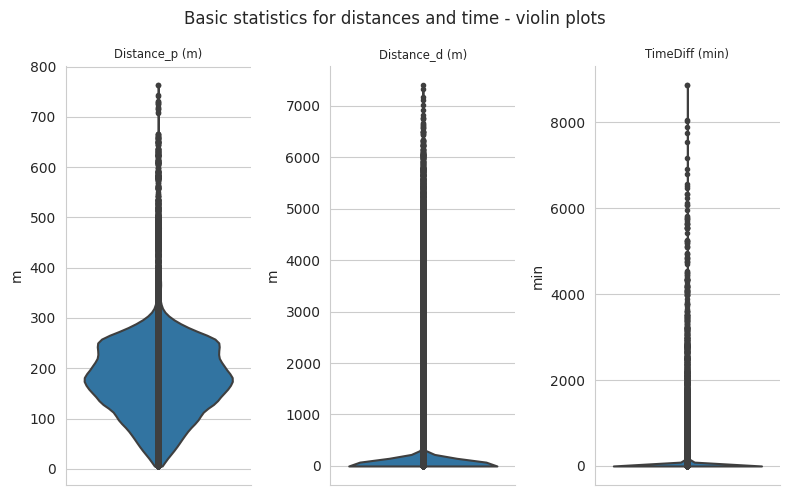

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = (8, 5))
grid = fig.add_gridspec(1, 3)
ax = fig.add_subplot(grid[0, 0])
fig.suptitle('Basic statistics for distances and time - violin plots')
sns.violinplot(data = df, y = 'distance', cut = 0, inner = 'point')
ax.set_title('Distance_p (m)', fontsize = 'small')
ax.set_ylabel('m')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax = fig.add_subplot(grid[0, 1])
sns.violinplot(data = df, y = 'nextDistance', cut = 0, inner = 'point')
ax.set_title('Distance_d (m)', fontsize = 'small')
ax.set_ylabel('m')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax = fig.add_subplot(grid[0, 2])
sns.violinplot(data = df, y = 'nextTimeDiff', cut = 0, inner = 'point')
ax.set_title('TimeDiff (min)', fontsize = 'small')
ax.set_ylabel('min')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
plt.savefig('Violin stats.png', bbox_inches = 'tight', dpi = 300)

## Some tests

Now we order the dataframe by time.

In [ ]:
df = df.sort_values(by = 'created_at')
df = df.reset_index(drop = True)

Create the scooter GeoDataFrame and explore it.

In [ ]:
milan_scooters = gpd.GeoDataFrame(df, crs = 'EPSG:4326', geometry = gpd.points_from_xy(df.lng, df.lat))

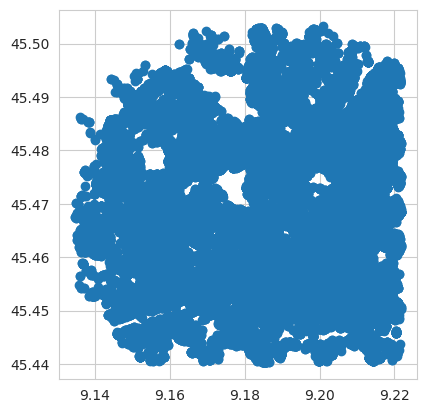

In [ ]:
milan_scooters.plot()
plt.show()

In [ ]:
# More in detail
milan_scooters['geometry'].explore()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
milan_scooters[milan_scooters.geometry.is_empty].shape[0]

0

In [ ]:
milan_scooters.geometry

0        POINT (9.14814 45.44600)
1        POINT (9.14937 45.44660)
2        POINT (9.14624 45.44590)
3        POINT (9.13855 45.46390)
4        POINT (9.21265 45.47560)
                   ...           
82682    POINT (9.15293 45.48930)
82683    POINT (9.15168 45.47720)
82684    POINT (9.15282 45.46740)
82685    POINT (9.15511 45.46060)
82686    POINT (9.14910 45.47860)
Name: geometry, Length: 82687, dtype: geometry

Now we may plot the trajectory of a random scooter.

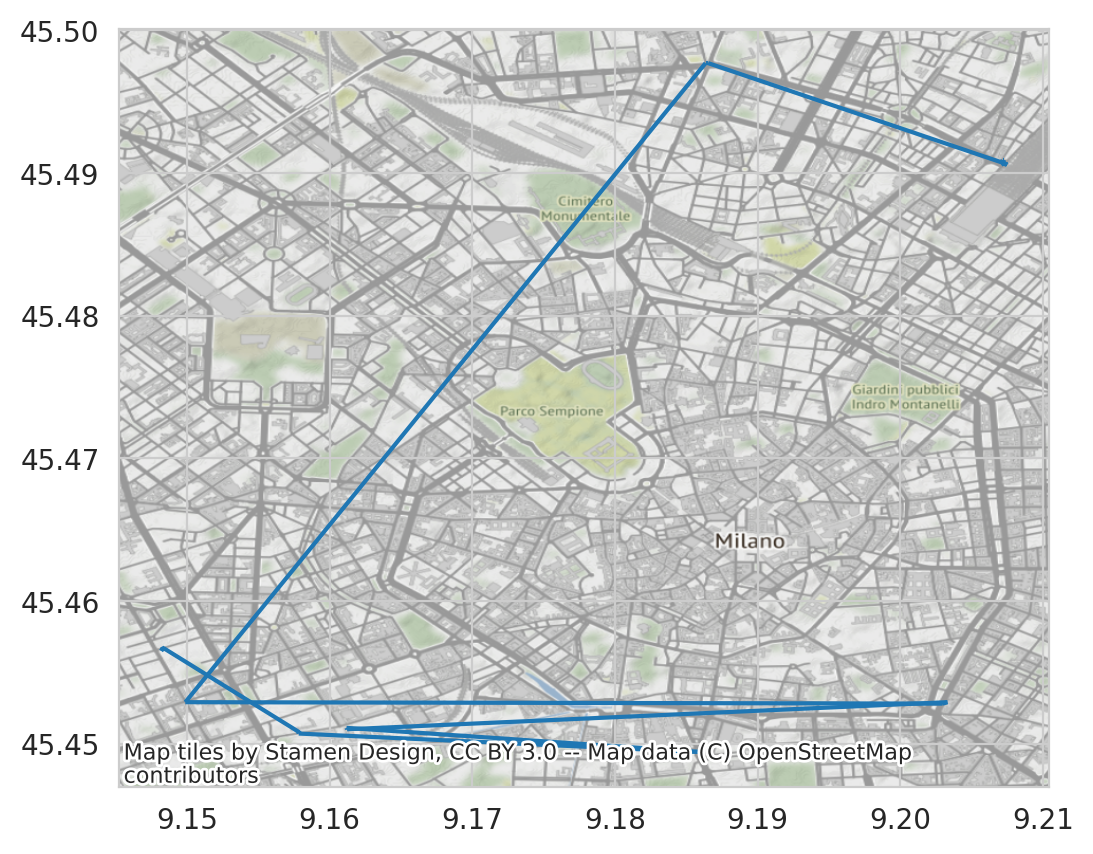

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6), dpi = 200)

df = df[df['provider_id'] == 1754.0]
df_ = df.set_index('created_at')
    
gdf_ = gpd.GeoDataFrame(df_, geometry = gpd.points_from_xy(df_['lng'], df_['lat']), crs = 'EPSG:4326')

traj = mpd.Trajectory(gdf_, 1)

traj.plot(ax = ax)
ctx.add_basemap(ax, crs = 'EPSG:4326')

plt.show()

## Milan zones

Now we may integrate our dataset with the city of Milan and its subdivision.

In [ ]:
milan_zones = gpd.read_file("/content/gdrive/MyDrive/DSLSC/Milan zones.zip")

In [ ]:
milan_zones

area  cod_istat  cod_istat_    istat                     nome  \
0     732.50162    15044.0     15044.0      0.0                 CAMBIAGO   
1     815.20915    15181.0     15181.0      0.0               RESCALDINA   
2    1296.75548    15221.0     15221.0      0.0         TREZZO SULL`ADDA   
3    1772.21591    15118.0     15118.0      0.0                  LEGNANO   
4     662.12313    15213.0     15213.0      0.0                   SOLARO   
..          ...        ...         ...      ...                      ...   
129   185.26265    15042.0     15042.0      0.0              CALVIGNASCO   
130   729.34443    15055.0     15055.0      0.0                 CASARILE   
131  1260.72296    15022.0     15022.0  15022.0                   BESATE   
132  1051.09543    15151.0     15151.0      0.0           MOTTA VISCONTI   
133  1655.00016    15191.0     15191.0      0.0  SAN COLOMBANO AL LAMBRO   

       perimeter prov  totale              zone_omoge  \
0    17228.19861   MI     0.0          Adda Martesana   
1    19061.58177   MI     0.0           Alto milanese   
2    24825.09493   MI     0.0          Adda Martesana   
3    31535.95058   MI     0.0           Alto milanese   
4    17416.98596   MI     0.0              Nord Ovest   
..           ...  ...     ...                     ...   
129   6142.03629   MI     0.0  Magentino e Abbiatense   
130  16126.82629   MI     0.0               Sud Ovest   
131  22105.05047   MI     2.0  Magentino e Abbiatense   
132  20061.78814   MI     0.0  Magentino e Abbiatense   
133  28286.42158   MI     0.0                 Sud Est   

                                              geometry  
0    POLYGON ((9.39479 45.56212, 9.39419 45.56351, ...  
1    POLYGON ((8.96744 45.60853, 8.96628 45.60962, ...  
2    POLYGON ((9.53317 45.59175, 9.52963 45.59141, ...  
3    POLYGON ((8.93893 45.61103, 8.92905 45.60986, ...  
4    POLYGON ((9.09446 45.60399, 9.09363 45.60417, ...  
..                                                 ...  
129  POLYGON ((9.02846 45.31678, 9.02798 45.31705, ...  
130  POLYGON ((9.12075 45.32179, 9.12086 45.32140, ...  
131  POLYGON ((8.98848 45.32163, 8.98858 45.32140, ...  
132  POLYGON ((8.99235 45.30120, 8.99224 45.30025, ...  
133  POLYGON ((9.47353 45.20004, 9.47352 45.19992, ...  

[134 rows x 10 columns]

<Axes: >

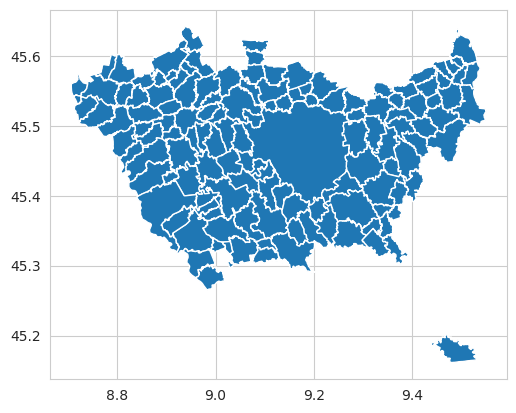

In [ ]:
milan_zones.plot()

In [ ]:
milan_nil = gpd.read_file("/content/gdrive/MyDrive/DSLSC/NIL_E0.zip")

In [ ]:
milan_nil

FID_1  FID_1_1  ID_NIL                   NIL     AreaHA        AreaMQ  \
0       0        0      74                 SACCO   70.84658  7.084658e+05   
1       1        1      82              COMASINA   92.67346  9.267346e+05   
2       2        2      75            STEPHENSON   56.00979  5.600979e+05   
3       3        3      66                  QT 8  102.44374  1.024437e+06   
4       4        4      29           ORTOMERCATO  140.25196  1.402520e+06   
..    ...      ...     ...                   ...        ...           ...   
83     83       83       6              TICINESE  125.50647  1.255065e+06   
84     84       84      47             CANTALUPA   92.67168  9.267168e+05   
85     85       85      86     PARCO DEI NAVIGLI  361.78363  3.617836e+06   
86     86       86      68                PAGANO  128.97343  1.289734e+06   
87     87       87       9  GARIBALDI REPUBBLICA   78.56683  7.856683e+05   

                                             geometry  
0   POLYGON ((509525.828 5040283.975, 509501.143 5...  
1   POLYGON ((513188.788 5041173.127, 513123.901 5...  
2   POLYGON ((510103.016 5039613.411, 510134.565 5...  
3   POLYGON ((511229.500 5036811.924, 511205.915 5...  
4   POLYGON ((518562.008 5033622.147, 518556.367 5...  
..                                                ...  
83  POLYGON ((514603.125 5033219.633, 514590.920 5...  
84  POLYGON ((512085.269 5029352.226, 512076.169 5...  
85  POLYGON ((511945.918 5029087.492, 511893.944 5...  
86  POLYGON ((512904.143 5034826.118, 512888.923 5...  
87  POLYGON ((515530.170 5036832.055, 515502.560 5...  

[88 rows x 7 columns]

<Axes: >

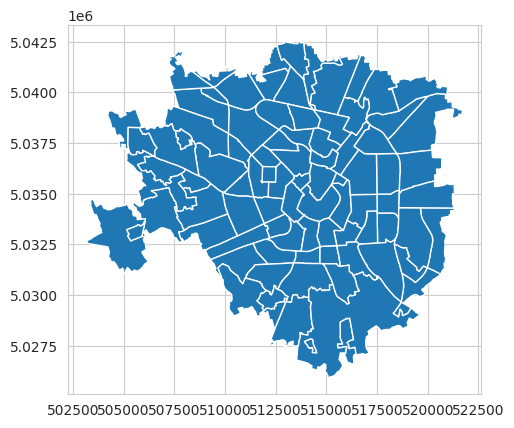

In [ ]:
milan_nil.plot()

Now it may be useful to get both informations in the same geodataframe.

In [ ]:
# Ensuring the crs is the same
if milan_zones.crs != milan_nil.crs:
  milan_nil = milan_nil.to_crs(milan_zones.crs)

# Repeat the row related to the center of Milan with the NIL values
rows = [0] * len(milan_nil)
for i in range(len(milan_nil)):
  rows[i] = milan_zones[milan_zones['nome'] == 'MILANO'].reset_index(drop = True)
  rows[i]['area'] = milan_nil['AreaMQ'][i] / 1000
  rows[i]['nome'] = milan_nil['NIL'][i]
  rows[i]['geometry'] = milan_nil['geometry'][i]

# Concatenate the original GeoDataFrame with the new rows
gdf = pd.concat([milan_zones] + rows, ignore_index = True)

In [ ]:
gdf

area  cod_istat  cod_istat_    istat                  nome  \
0     732.501620    15044.0     15044.0      0.0              CAMBIAGO   
1     815.209150    15181.0     15181.0      0.0            RESCALDINA   
2    1296.755480    15221.0     15221.0      0.0      TREZZO SULL`ADDA   
3    1772.215910    15118.0     15118.0      0.0               LEGNANO   
4     662.123130    15213.0     15213.0      0.0                SOLARO   
..           ...        ...         ...      ...                   ...   
217  1255.064748    15146.0     15146.0  15146.0              TICINESE   
218   926.716806    15146.0     15146.0  15146.0             CANTALUPA   
219  3617.836273    15146.0     15146.0  15146.0     PARCO DEI NAVIGLI   
220  1289.734294    15146.0     15146.0  15146.0                PAGANO   
221   785.668250    15146.0     15146.0  15146.0  GARIBALDI REPUBBLICA   

        perimeter prov  totale      zone_omoge  \
0     17228.19861   MI     0.0  Adda Martesana   
1     19061.58177   MI     0.0   Alto milanese   
2     24825.09493   MI     0.0  Adda Martesana   
3     31535.95058   MI     0.0   Alto milanese   
4     17416.98596   MI     0.0      Nord Ovest   
..            ...  ...     ...             ...   
217  106297.51179   MI     8.0          Milano   
218  106297.51179   MI     8.0          Milano   
219  106297.51179   MI     8.0          Milano   
220  106297.51179   MI     8.0          Milano   
221  106297.51179   MI     8.0          Milano   

                                              geometry  
0    POLYGON ((9.39479 45.56212, 9.39419 45.56351, ...  
1    POLYGON ((8.96744 45.60853, 8.96628 45.60962, ...  
2    POLYGON ((9.53317 45.59175, 9.52963 45.59141, ...  
3    POLYGON ((8.93893 45.61103, 8.92905 45.60986, ...  
4    POLYGON ((9.09446 45.60399, 9.09363 45.60417, ...  
..                                                 ...  
217  POLYGON ((9.18676 45.45235, 9.18660 45.45184, ...  
218  POLYGON ((9.15446 45.41759, 9.15435 45.41743, ...  
219  POLYGON ((9.15268 45.41521, 9.15201 45.41635, ...  
220  POLYGON ((9.16507 45.46684, 9.16488 45.46619, ...  
221  POLYGON ((9.19873 45.48485, 9.19837 45.48389, ...  

[222 rows x 10 columns]

At this point we may clean the GeoDataFrame from useless columns and rows.

In [ ]:
gdf.drop(columns = ['cod_istat', 'cod_istat_', 'istat', 'totale', 'zone_omoge', 'perimeter', 'prov'], inplace = True)

In [ ]:
# Drop general Milan boundaries
gdf = gdf.drop(60)
gdf = gdf.reset_index(drop = True)
# Drop San Colombano al Lambro (too far)
gdf = gdf.drop(132)
gdf = gdf.reset_index(drop = True)

<Axes: >

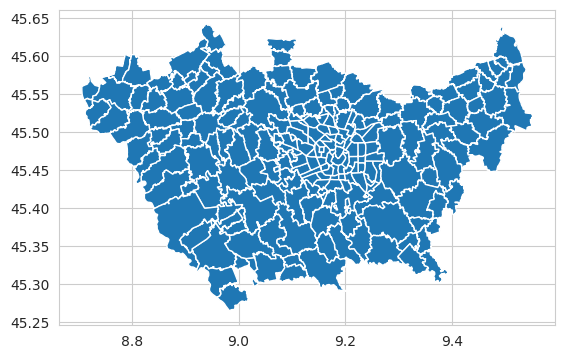

In [ ]:
gdf.plot()

Let's see the convex hull related to the scooters positions.

In [ ]:
convex_hull_scooters = gpd.GeoDataFrame(
    geometry = [milan_scooters.geometry.unary_union.convex_hull], 
    columns = ['geometry'],
    crs = milan_scooters.crs)

convex_hull_scooters.explore()

## Filtering

Now we have to filter the zones of Milan.

In [ ]:
# Ensuring the crs is the same
if milan_scooters.crs != gdf.crs:
  gdf = gdf.to_crs(milan_scooters.crs)

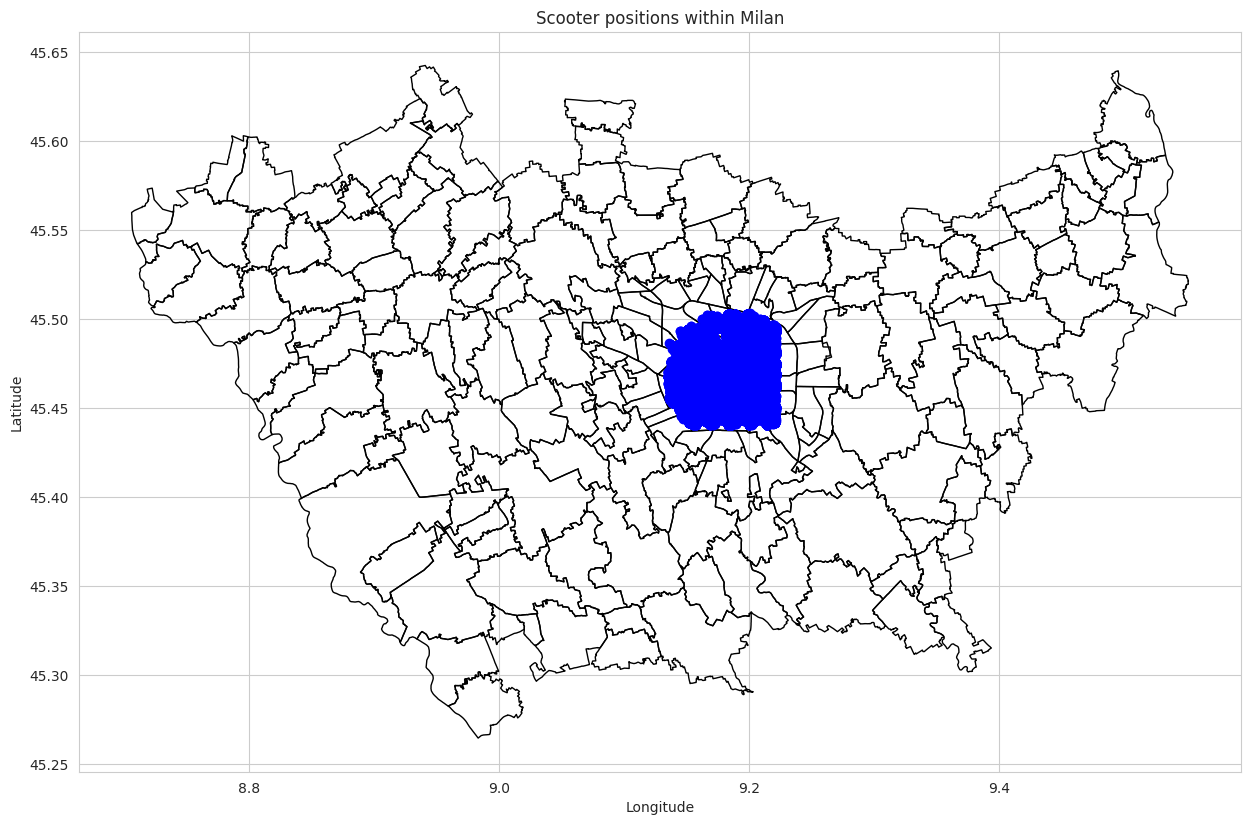

In [ ]:
# Plot the scooter positions within Milan zones
ax = gdf.plot(edgecolor = 'k', facecolor = 'none', figsize = (15, 10))
milan_scooters.plot(ax = ax, color = "blue")
ax.set_title('Scooter positions within Milan')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

We have to remove the areas which are too far from the scooters positions.

In [ ]:
# Spatial join between the zones and scooters GeoDataFrames
zones_with_scooters_gdf = gpd.sjoin(gdf, milan_scooters, predicate = 'contains')
# Group the GeoDataFrame by zone ID and count the number of scooters in each zone
scooter_counts_by_zone = zones_with_scooters_gdf.groupby('nome').size()
# Get the IDs of the zones with scooters
zones_with_scooters_ids = scooter_counts_by_zone.index
# Filter the zones GeoDataFrame in order to remove the zones without scooters
zones_gdf = gdf[gdf['nome'].isin(zones_with_scooters_ids)]
zones_gdf = zones_gdf.reset_index(drop = True)

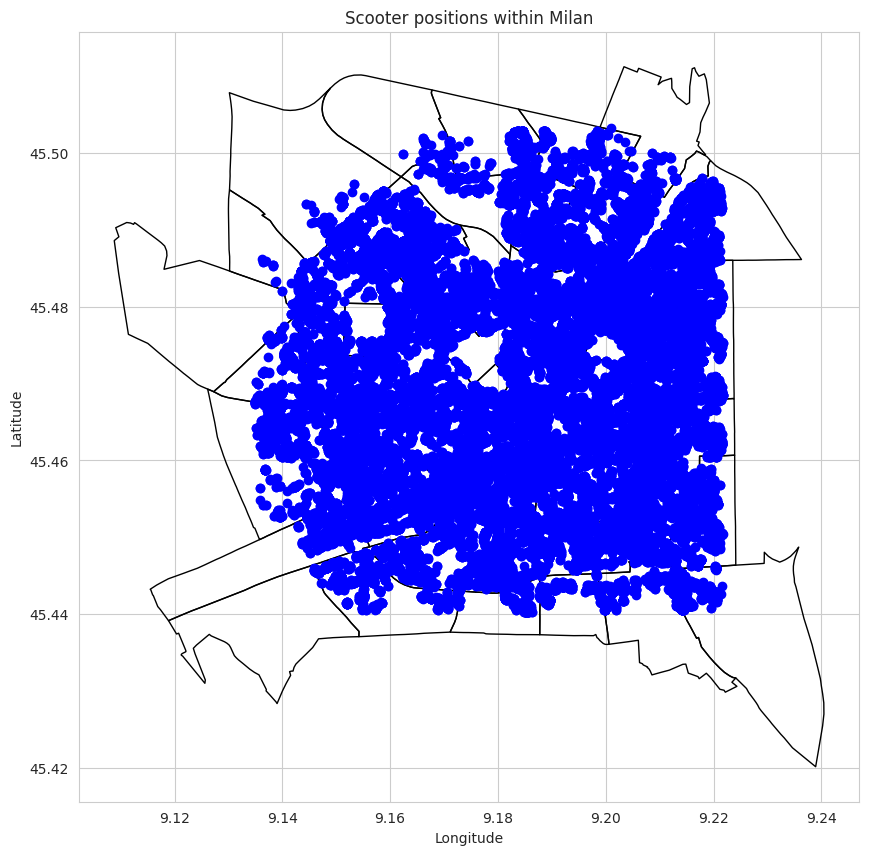

In [ ]:
# Plot the scooter positions within Milan zones
ax = zones_gdf.plot(edgecolor = 'k', facecolor = 'none', figsize = (15, 10))
milan_scooters.plot(ax = ax, color = "blue")
ax.set_title('Scooter positions within Milan')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [ ]:
print('The scooters cross a total of ' + str(len(zones_gdf)) + ' zones. These zones are:')
for i in range(len(zones_gdf)):
  print(zones_gdf['nome'][i])

The scooters cross a total of 42 zones. These zones are:
QT 8
S. SIRO
GHISOLFA
GIAMBELLINO
S. CRISTOFORO
RONCHETTO SUL NAVIGLIO
TIBALDI
EX OM - MORIVIONE
FARINI
UMBRIA - MOLISE
SELINUNTE
GUASTALLA
BRERA
DUOMO
SCALO ROMANA
MAGENTA - S. VITTORE
LODI - CORVETTO
VILLAPIZZONE
BOVISA
DERGANO
PORTELLO
TRE TORRI
PARCO SEMPIONE
GIARDINI PORTA VENEZIA
TORTONA
NAVIGLI
XXII MARZO
BUENOS AIRES - VENEZIA
CENTRALE
GRECO
LORETO
MACIACHINI - MAGGIOLINA
ISOLA
SARPI
DE ANGELI - MONTE ROSA
WASHINGTON
BANDE NERE
PORTA ROMANA
VIGENTINA
TICINESE
PAGANO
GARIBALDI REPUBBLICA


It may be interesting to plot the positions of the scooters when the column "type" is:

* "waiting long"
* "first seen / pick-up"
* "last seen / drop-off"

In [ ]:
milan_scooters[milan_scooters['type'] == 'waiting long'].head()

provider_id      lat      lng          created_at    distance  placename  \
154         10.0  45.4852  9.20088 2019-12-02 00:40:15  116.506945      540.0   
182        254.0  45.4810  9.16091 2019-12-02 00:40:25  210.899021      495.0   
264        955.0  45.4839  9.18753 2019-12-02 00:55:23  114.686968      537.0   
426       1130.0  45.4407  9.21422 2019-12-02 01:25:16  383.594257      209.0   
462       1596.0  45.4421  9.18144 2019-12-02 01:25:25   16.689411      203.0   

     placelat  placelon                      lat&lng  \
154  45.48425   9.20025           (45.4852, 9.20088)   
182  45.47955   9.16265  (45.481, 9.160910000000001)   
264  45.48425   9.18615           (45.4839, 9.18753)   
426  45.44195   9.20965           (45.4407, 9.21422)   
462  45.44195   9.18145           (45.4421, 9.18144)   

                 prevObservation               nextObservation  \
154           (45.4852, 9.20088)            (45.4853, 9.20084)   
182  (45.481, 9.160910000000001)             (45.481, 9.16103)   
264           (45.4839, 9.18753)  (45.4839, 9.187489999999999)   
426           (45.4407, 9.21422)            (45.4407, 9.21413)   
462           (45.4421, 9.18144)             (45.442, 9.18145)   

         nextCreated_at  nextDistance  nextTimeDiff      prevCreated_at  \
154 2019-12-02 01:10:17     11.545681     30.033333 2019-12-02 00:25:17   
182 2019-12-02 01:10:27      9.382096     30.033333 2019-12-02 00:25:27   
264 2019-12-02 01:25:23      3.127205     30.000000 2019-12-02 00:40:20   
426 2019-12-02 04:10:16      7.041587    165.000000 2019-12-02 01:10:18   
462 2019-12-02 02:40:24     11.141546     74.983333 2019-12-02 01:10:22   

     prevDistance  prevTimeDiff  samePlace          type  \
154           0.0     14.966667        1.0  waiting long   
182           0.0     14.966667        1.0  waiting long   
264           0.0     15.050000        1.0  waiting long   
426           0.0     14.966667        1.0  waiting long   
462           0.0     15.050000        1.0  waiting long   

                     geometry  
154  POINT (9.20088 45.48520)  
182  POINT (9.16091 45.48100)  
264  POINT (9.18753 45.48390)  
426  POINT (9.21422 45.44070)  
462  POINT (9.18144 45.44210)

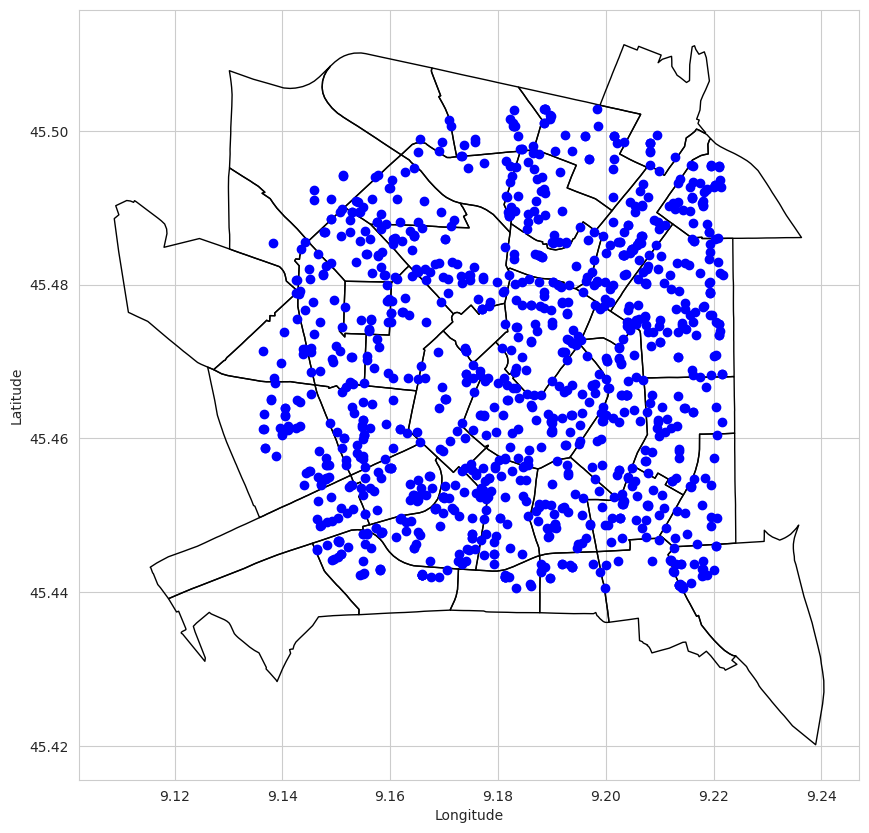

In [ ]:
ax = zones_gdf.plot(edgecolor = 'k', facecolor = 'none', figsize = (15, 10))
milan_scooters[milan_scooters['type'] == 'waiting long'].plot(ax = ax, color = "blue")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [ ]:
milan_scooters[milan_scooters['type'] == 'first seen / pick-up'].head()

provider_id      lat      lng          created_at    distance  placename  \
0       1025.0  45.4460  9.14814 2019-12-02 00:10:10   79.041951      233.0   
1       1008.0  45.4466  9.14937 2019-12-02 00:10:10   64.390379      233.0   
2       1488.0  45.4459  9.14624 2019-12-02 00:10:10  199.014228      233.0   
3       1342.0  45.4639  9.13855 2019-12-02 00:10:11  178.544823      379.0   
4       1505.0  45.4756  9.21265 2019-12-02 00:10:12  156.900503      469.0   

   placelat  placelon                       lat&lng prevObservation  \
0  45.44665   9.14855  (45.44600000000001, 9.14814)             NaN   
1  45.44665   9.14855            (45.4466, 9.14937)             NaN   
2  45.44665   9.14855  (45.4459, 9.146239999999999)             NaN   
3  45.46545   9.13915            (45.4639, 9.13855)             NaN   
4  45.47485   9.21435            (45.4756, 9.21265)             NaN   

                nextObservation      nextCreated_at  nextDistance  \
0            (45.4461, 9.14822) 2019-12-02 00:25:11     12.755082   
1  (45.4465, 9.149469999999999) 2019-12-02 00:25:11     13.591328   
2            (45.4458, 9.14637) 2019-12-02 00:25:11     15.065065   
3  (45.4636, 9.138539999999999) 2019-12-02 00:25:10     33.351423   
4            (45.4758, 9.21245) 2019-12-02 00:25:15     27.178111   

   nextTimeDiff prevCreated_at  prevDistance  prevTimeDiff  samePlace  \
0     15.016667            NaT           0.0           0.0        0.0   
1     15.016667            NaT           0.0           0.0        0.0   
2     15.016667            NaT           0.0           0.0        0.0   
3     14.983333            NaT           0.0           0.0        0.0   
4     15.050000            NaT           0.0           0.0        0.0   

                   type                  geometry  
0  first seen / pick-up  POINT (9.14814 45.44600)  
1  first seen / pick-up  POINT (9.14937 45.44660)  
2  first seen / pick-up  POINT (9.14624 45.44590)  
3  first seen / pick-up  POINT (9.13855 45.46390)  
4  first seen / pick-up  POINT (9.21265 45.47560)

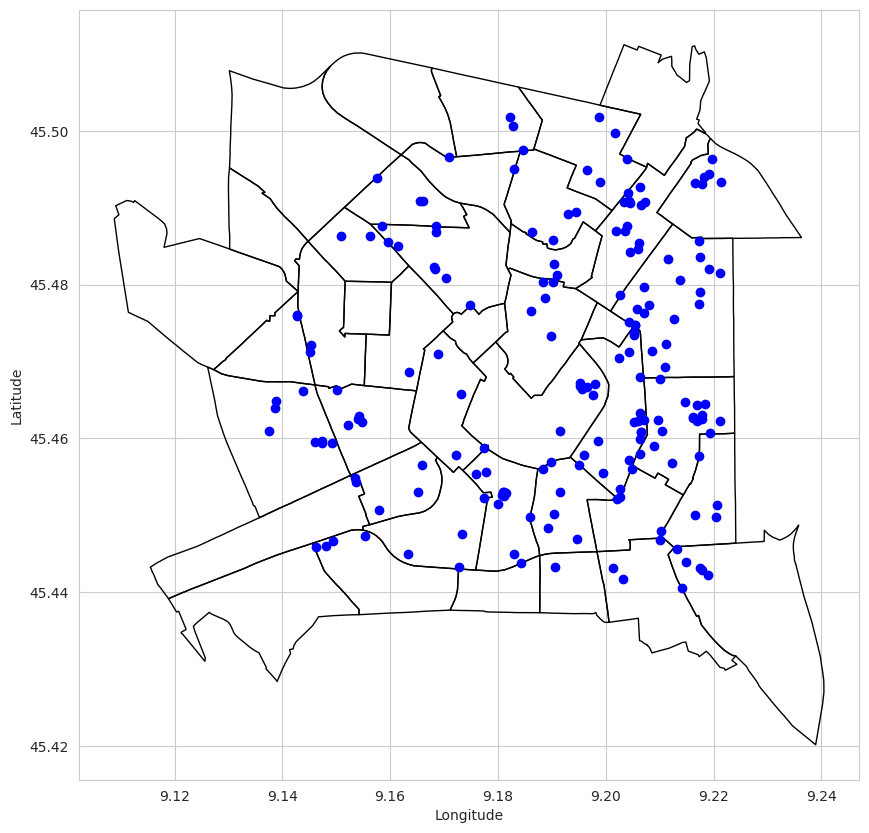

In [ ]:
ax = zones_gdf.plot(edgecolor = 'k', facecolor = 'none', figsize = (15, 10))
milan_scooters[milan_scooters['type'] == 'first seen / pick-up'].plot(ax = ax, color = "blue")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [ ]:
milan_scooters[milan_scooters['type'] == 'last seen / drop-off'].head()

provider_id      lat      lng          created_at    distance  \
20587        132.0  45.4856  9.21616 2019-12-03 17:55:11  206.241477   
20887        266.0  45.4641  9.18066 2019-12-03 18:10:25  162.262853   
21823        269.0  45.4739  9.22135 2019-12-03 19:40:16  208.547908   
27728       1297.0  45.4900  9.16506 2019-12-04 08:10:40  213.693706   
29672        195.0  45.4582  9.21796 2019-12-04 11:40:12  253.706630   

       placename  placelat  placelon                       lat&lng  \
20587      543.0  45.48425   9.21435            (45.4856, 9.21616)   
20887      388.0  45.46545   9.18145  (45.4641, 9.180660000000001)   
21823      470.0  45.47485   9.21905            (45.4739, 9.22135)   
27728      570.0  45.48895   9.16735              (45.49, 9.16506)   
29672      322.0  45.45605   9.21905            (45.4582, 9.21796)   

                    prevObservation nextObservation nextCreated_at  \
20587            (45.4525, 9.17653)             NaN            NaT   
20887  (45.4689, 9.191510000000001)             NaN            NaT   
21823  (45.4707, 9.192089999999999)             NaN            NaT   
27728            (45.4902, 9.16487)             NaN            NaT   
29672            (45.4581, 9.21803)             NaN            NaT   

       nextDistance  nextTimeDiff      prevCreated_at  prevDistance  \
20587           0.0           0.0 2019-12-03 17:25:31   4810.170152   
20887           0.0           0.0 2019-12-03 17:40:41   1002.287028   
21823           0.0           0.0 2019-12-03 19:10:30   2315.502295   
27728           0.0           0.0 2019-12-04 07:55:42     26.733791   
29672           0.0           0.0 2019-12-04 11:25:13     12.389486   

       prevTimeDiff  samePlace                  type                  geometry  
20587     29.666667        0.0  last seen / drop-off  POINT (9.21616 45.48560)  
20887     29.733333        0.0  last seen / drop-off  POINT (9.18066 45.46410)  
21823     29.766667        0.0  last seen / drop-off  POINT (9.22135 45.47390)  
27728     14.966667        0.0  last seen / drop-off  POINT (9.16506 45.49000)  
29672     14.983333        0.0  last seen / drop-off  POINT (9.21796 45.45820)

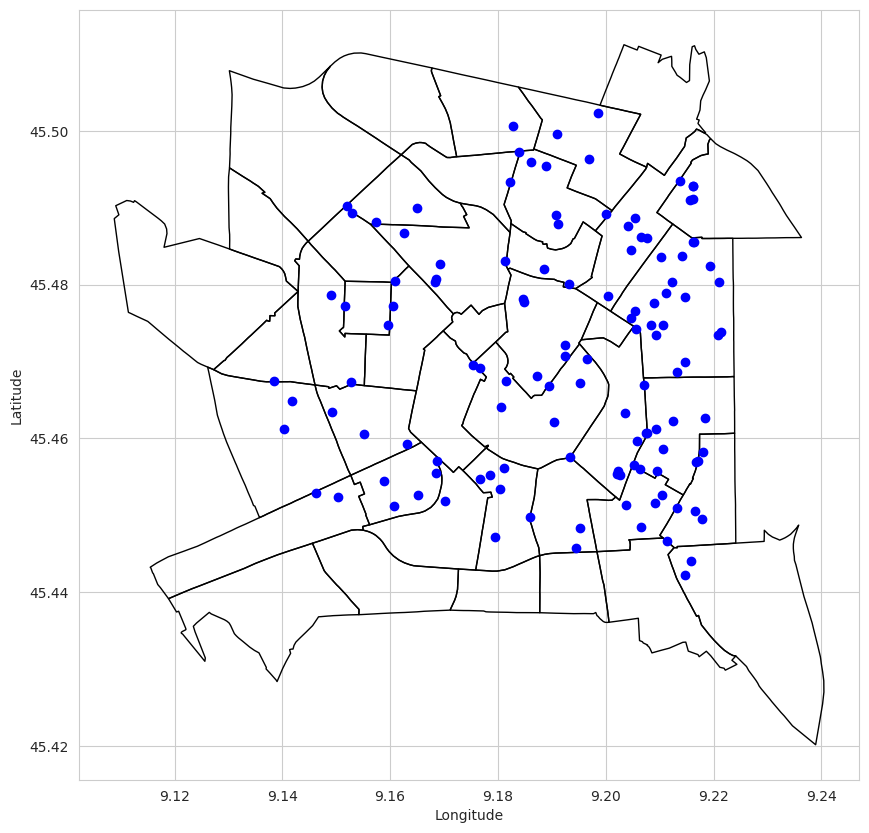

In [ ]:
ax = zones_gdf.plot(edgecolor = 'k', facecolor = 'none', figsize = (15, 10))
milan_scooters[milan_scooters['type'] == 'last seen / drop-off'].plot(ax = ax, color = "blue")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

Taking a look at the columns and graphs we can guess that:

* *waiting long* is referred to all those scooters which stay in the same place for some time, without dropping off. In fact, the column "samePlace" is always equal to 1.
* *first seen / pick-up* is the starting point for each scooter after the first pick-up. In fact, there are no previous observations.
* *last seen / drop-off* is the end point for each scooter before the last drop-off. In fact, there are no subsequent observations.

## Choropleth maps

We can now plot some maps to discover insights within the dataset.

### Static

First of all let's plot the general cloropleth map.

<Figure size 1200x1000 with 0 Axes>

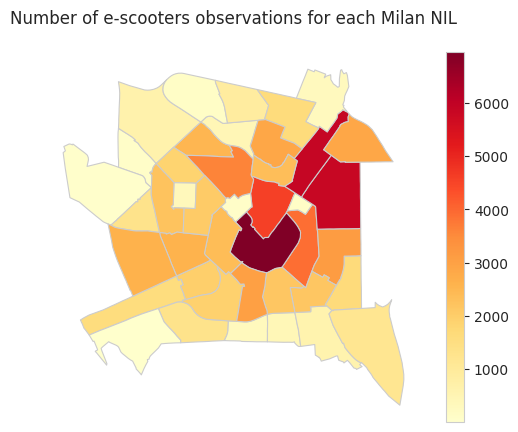

In [ ]:
# Spatial join
joined_gdf = gpd.sjoin(milan_scooters, zones_gdf, predicate = 'within')
# Group the scooter positions by zone and count the total number of positions in each zone
count_df = joined_gdf.groupby('nome').size().reset_index(name = 'count')
# Merge the count dataframe with the zone GeoDataFrame
merged_gdf = zones_gdf.merge(count_df, on = 'nome')

plt.figure(figsize = (12, 10))

# Plot the choropleth map
merged_gdf.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)

plt.title('Number of e-scooters observations for each Milan NIL\n')

# Save to PNG
plt.axis('off')
plt.savefig('scooter_counts.png', bbox_inches = 'tight', dpi = 300)

In [ ]:
merged_gdf = merged_gdf.sort_values('count', ascending = False)
merged_gdf['perc'] = np.around((merged_gdf['count']/merged_gdf['count'].sum())*100, 2)
merged_gdf.head(10)

area                    nome  \
13  2341.704073                   DUOMO   
28  1556.077522                CENTRALE   
27  2877.542274  BUENOS AIRES - VENEZIA   
12  1637.395233                   BRERA   
11  1548.020742               GUASTALLA   
33  1811.914533                   SARPI   
26  1637.499709              XXII MARZO   
39  1255.064748                TICINESE   
32  1322.966344                   ISOLA   
30  1747.565534                  LORETO   

                                             geometry  count  perc  
13  POLYGON ((9.18126 45.46903, 9.18213 45.46833, ...   6946  8.40  
28  POLYGON ((9.21490 45.49482, 9.21325 45.49314, ...   5864  7.09  
27  POLYGON ((9.21527 45.48645, 9.21599 45.48610, ...   5837  7.06  
12  POLYGON ((9.19769 45.47655, 9.19702 45.47536, ...   4562  5.52  
11  POLYGON ((9.20659 45.47194, 9.20659 45.47185, ...   3894  4.71  
33  POLYGON ((9.18185 45.48201, 9.18243 45.48125, ...   3610  4.37  
26  POLYGON ((9.22382 45.46806, 9.22384 45.46671, ...   3132  3.79  
39  POLYGON ((9.18676 45.45235, 9.18660 45.45184, ...   3022  3.65  
32  POLYGON ((9.20087 45.48938, 9.19926 45.48799, ...   2872  3.47  
30  POLYGON ((9.21788 45.48617, 9.21700 45.48613, ...   2869  3.47

Now let's plot the map showing the differences between weekend and workdays.

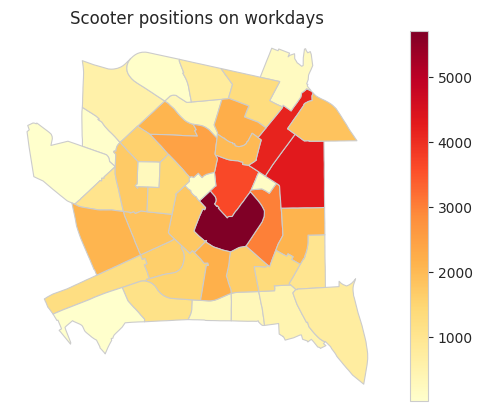

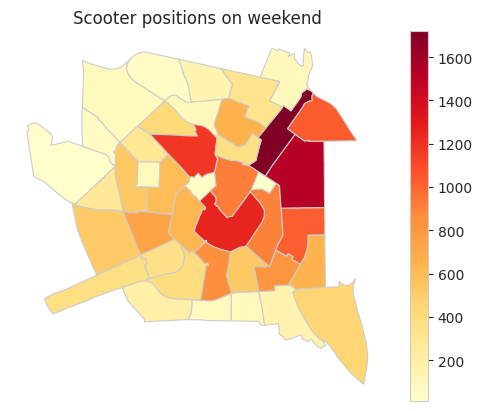

In [ ]:
# Add a column to the GeoDataFrame indicating whether each timestamp is a workday or a weekend day
milan_scooters['day_of_week'] = pd.to_datetime(milan_scooters['created_at']).dt.dayofweek
milan_scooters['is_workday'] = milan_scooters['day_of_week'].isin(range(0, 5))

# Split the scooter positions into separate GeoDataFrames for workdays and weekends
workdays_scooters = milan_scooters[milan_scooters['is_workday'] == True]
weekend_scooters = milan_scooters[milan_scooters['is_workday'] == False]

# Spatial join for workdays
joined_workdays = gpd.sjoin(workdays_scooters, zones_gdf, predicate = 'within')
count_workdays = joined_workdays.groupby('nome').size().reset_index(name = 'count')
merged_workdays = zones_gdf.merge(count_workdays, on = 'nome')

# Plot the choropleth map for workdays
ax_workdays = merged_workdays.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_workdays.set_axis_off()
ax_workdays.set_title('Scooter positions on workdays')

# Spatial join for the weekend
joined_weekends = gpd.sjoin(weekend_scooters, zones_gdf, predicate = 'within')
count_weekends = joined_weekends.groupby('nome').size().reset_index(name = 'count')
merged_weekends = zones_gdf.merge(count_weekends, on = 'nome')

# Plot the choropleth map for weekends
ax_weekends = merged_weekends.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_weekends.set_axis_off()
ax_weekends.set_title('Scooter positions on weekend')

# Save both to PNG
fig_workdays = ax_workdays.get_figure()
fig_workdays.savefig('scooter_counts_workdays.png', bbox_inches = 'tight', dpi = 300)
fig_weekends = ax_weekends.get_figure()
fig_weekends.savefig('scooter_counts_weekend.png', bbox_inches = 'tight', dpi = 300)

In [ ]:
merged_workdays = merged_workdays.sort_values('count', ascending = False)
merged_workdays['perc'] = np.around((merged_workdays['count']/merged_workdays['count'].sum())*100, 2)
merged_workdays.head(10)

area                    nome  \
13  2341.704073                   DUOMO   
27  2877.542274  BUENOS AIRES - VENEZIA   
28  1556.077522                CENTRALE   
12  1637.395233                   BRERA   
11  1548.020742               GUASTALLA   
33  1811.914533                   SARPI   
32  1322.966344                   ISOLA   
39  1255.064748                TICINESE   
26  1637.499709              XXII MARZO   
2   1051.452205                GHISOLFA   

                                             geometry  count  perc  
13  POLYGON ((9.18126 45.46903, 9.18213 45.46833, ...   5699  9.17  
27  POLYGON ((9.21527 45.48645, 9.21599 45.48610, ...   4314  6.94  
28  POLYGON ((9.21490 45.49482, 9.21325 45.49314, ...   4145  6.67  
12  POLYGON ((9.19769 45.47655, 9.19702 45.47536, ...   3644  5.86  
11  POLYGON ((9.20659 45.47194, 9.20659 45.47185, ...   2991  4.81  
33  POLYGON ((9.18185 45.48201, 9.18243 45.48125, ...   2438  3.92  
32  POLYGON ((9.20087 45.48938, 9.19926 45.48799, ...   2217  3.57  
39  POLYGON ((9.18676 45.45235, 9.18660 45.45184, ...   2165  3.48  
26  POLYGON ((9.22382 45.46806, 9.22384 45.46671, ...   2113  3.40  
2   POLYGON ((9.17239 45.48745, 9.16987 45.48750, ...   2091  3.37

In [ ]:
merged_weekends = merged_weekends.sort_values('count', ascending = False)
merged_weekends['perc'] = np.around((merged_weekends['count']/merged_weekends['count'].sum())*100, 2)
merged_weekends.head(10)

area                    nome  \
27  1556.077522                CENTRALE   
26  2877.542274  BUENOS AIRES - VENEZIA   
12  2341.704073                   DUOMO   
32  1811.914533                   SARPI   
29  1747.565534                  LORETO   
25  1637.499709              XXII MARZO   
11  1637.395233                   BRERA   
10  1548.020742               GUASTALLA   
38  1255.064748                TICINESE   
36  1002.793532            PORTA ROMANA   

                                             geometry  count  perc  
27  POLYGON ((9.21490 45.49482, 9.21325 45.49314, ...   1719  8.36  
26  POLYGON ((9.21527 45.48645, 9.21599 45.48610, ...   1523  7.41  
12  POLYGON ((9.18126 45.46903, 9.18213 45.46833, ...   1247  6.07  
32  POLYGON ((9.18185 45.48201, 9.18243 45.48125, ...   1172  5.70  
29  POLYGON ((9.21788 45.48617, 9.21700 45.48613, ...   1033  5.03  
25  POLYGON ((9.22382 45.46806, 9.22384 45.46671, ...   1019  4.96  
11  POLYGON ((9.19769 45.47655, 9.19702 45.47536, ...    918  4.47  
10  POLYGON ((9.20659 45.47194, 9.20659 45.47185, ...    903  4.39  
38  POLYGON ((9.18676 45.45235, 9.18660 45.45184, ...    857  4.17  
36  POLYGON ((9.21004 45.44739, 9.21019 45.44731, ...    822  4.00

Now we may compare day and night (i.e. after the subway closure at ~01:00 a.m., until ~5:00 a.m.), in weekend and workdays.

In [ ]:
night_scooters = milan_scooters[(milan_scooters['created_at'].dt.hour >= 1) & (milan_scooters['created_at'].dt.hour <= 4)]
day_scooters = milan_scooters.drop(night_scooters.index)

In [ ]:
work_night_scooters = night_scooters[night_scooters['created_at'].dt.day < 7]
week_night_scooters = night_scooters[night_scooters['created_at'].dt.day >= 7]
work_day_scooters = day_scooters[day_scooters['created_at'].dt.day < 7]
week_day_scooters = day_scooters[day_scooters['created_at'].dt.day >= 7]

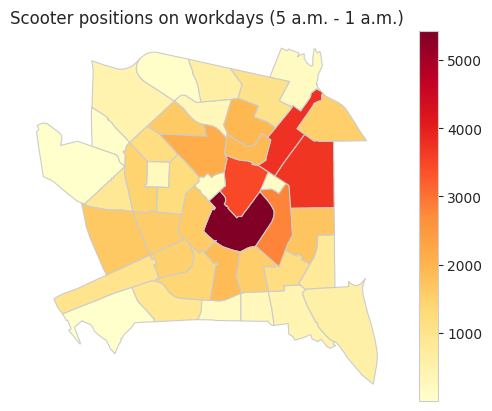

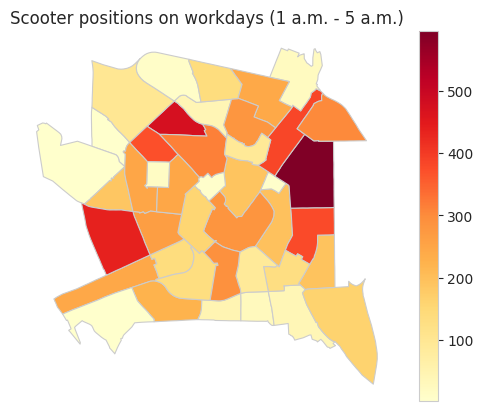

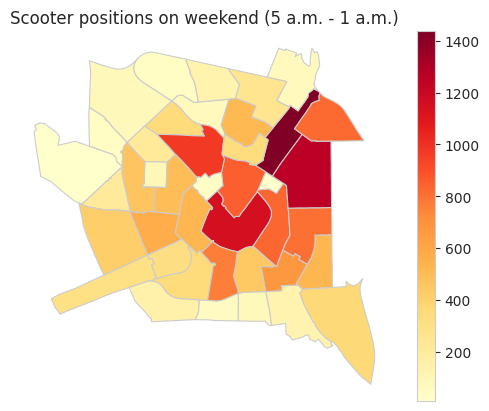

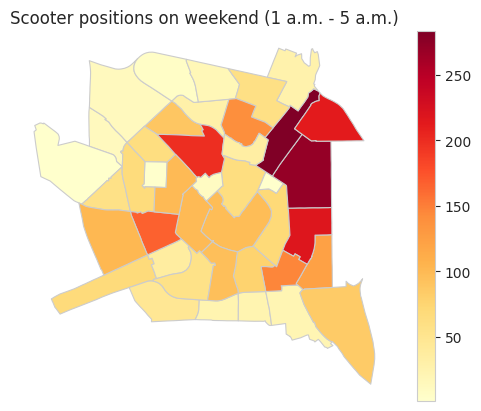

In [ ]:
# Spatial join for day workdays
joined_day_workdays = gpd.sjoin(work_day_scooters, zones_gdf, predicate = 'within')
count_day_workdays = joined_day_workdays.groupby('nome').size().reset_index(name = 'count')
merged_day_workdays = zones_gdf.merge(count_day_workdays, on = 'nome')

# Plot the choropleth map
ax_day_workdays = merged_day_workdays.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_day_workdays.set_axis_off()
ax_day_workdays.set_title('Scooter positions on workdays (5 a.m. - 1 a.m.)')

# Spatial join for night workdays
joined_night_workdays = gpd.sjoin(work_night_scooters, zones_gdf, predicate = 'within')
count_night_workdays = joined_night_workdays.groupby('nome').size().reset_index(name = 'count')
merged_night_workdays = zones_gdf.merge(count_night_workdays, on = 'nome')

# Plot the choropleth map
ax_night_workdays = merged_night_workdays.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_night_workdays.set_axis_off()
ax_night_workdays.set_title('Scooter positions on workdays (1 a.m. - 5 a.m.)')

# Spatial join for day weekends
joined_day_weekdays = gpd.sjoin(week_day_scooters, zones_gdf, predicate = 'within')
count_day_weekdays = joined_day_weekdays.groupby('nome').size().reset_index(name = 'count')
merged_day_weekdays = zones_gdf.merge(count_day_weekdays, on = 'nome')

# Plot the choropleth map
ax_day_weekdays = merged_day_weekdays.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_day_weekdays.set_axis_off()
ax_day_weekdays.set_title('Scooter positions on weekend (5 a.m. - 1 a.m.)')

# Spatial join for night weekends
joined_night_weekdays = gpd.sjoin(week_night_scooters, zones_gdf, predicate = 'within')
count_night_weekdays = joined_night_weekdays.groupby('nome').size().reset_index(name = 'count')
merged_night_weekdays = zones_gdf.merge(count_night_weekdays, on = 'nome')

# Plot the choropleth map
ax_night_weekdays = merged_night_weekdays.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_night_weekdays.set_axis_off()
ax_night_weekdays.set_title('Scooter positions on weekend (1 a.m. - 5 a.m.)')

# Save to PNG
fig_day_workdays = ax_day_workdays.get_figure()
fig_day_workdays.savefig('scooter_counts_day_workdays.png', bbox_inches = 'tight', dpi = 300)
fig_night_workdays = ax_night_workdays.get_figure()
fig_night_workdays.savefig('scooter_counts_night_workdays.png', bbox_inches = 'tight', dpi = 300)
fig_day_weekdays = ax_day_weekdays.get_figure()
fig_day_weekdays.savefig('scooter_counts_day_weekend.png', bbox_inches = 'tight', dpi = 300)
fig_night_weekdays = ax_night_weekdays.get_figure()
fig_night_weekdays.savefig('scooter_counts_night_weekend.png', bbox_inches = 'tight', dpi = 300)

### Animated

Now we plot an animated cloropleth map representing the presence of the scooters in each zone.

In [ ]:
# First of all we have to round the time interval
milan_scooters['timestamp'] = pd.to_datetime(milan_scooters['created_at']).dt.round('H')

# Time intervals to animate over
start_date_str = '2019-12-02 00:00:00'
end_date_str = '2019-12-09 00:00:00'
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)
time_intervals = pd.date_range(start = start_date, end = end_date, freq = 'H')
time_intervals_str = [d.strftime('%Y-%m-%d %H:%M:%S') for d in time_intervals]

# One GeodataFrame for each time interval
gdfs_by_time = []
for t in time_intervals_str:
  scooters_t = milan_scooters[milan_scooters['timestamp'] == t]
  zones_with_scooters_t = gpd.sjoin(zones_gdf, scooters_t, predicate = 'contains')
  scooter_counts_by_zone_t = zones_with_scooters_t.groupby('nome').size()
  zones_with_scooters_gdf_t = zones_gdf.merge(scooter_counts_by_zone_t.to_frame('scooter_count'), left_on = 'nome', right_index = True, how = 'left')
  zones_with_scooters_gdf_t['scooter_count'].fillna(0, inplace = True)
  gdfs_by_time.append(zones_with_scooters_gdf_t)

cmap = 'YlOrRd'
# Normalize the color scale by scooter count
norm = plt.Normalize(vmin = 0, vmax = max([gdf['scooter_count'].max() for gdf in gdfs_by_time]))

# Animation function that updates the plot for each time interval
def update_map(frame):
  gdf = gdfs_by_time[frame]
  ax.clear()
  ax.axis('off')
  ax.set_title('Scooters positions: ' + time_intervals_str[frame], fontdict = {'fontsize': '20', 'fontweight' : '3'})
  # Plot the choropleth map
  gdf.plot(column = 'scooter_count', cmap = cmap, linewidth = 0.8, ax = ax, edgecolor = '0.8', norm = norm)

# Create the animation
fig, ax = plt.subplots(figsize = (15, 10))
ani = animation.FuncAnimation(fig, update_map, frames = len(gdfs_by_time), interval = 500, repeat = True)

# Save the animation
ani.save('scooters_animation.mp4', dpi = 300)

Now we may explore the scooters positions at different hours with another animated choropleth map.

In [ ]:
# First of all we have to select the hours
milan_scooters['hours'] = pd.to_datetime(milan_scooters['created_at'].astype(str)).dt.hour

# Time intervals to animate over
time_intervals = np.arange(0, 24)

# One GeodataFrame for each time interval
gdfs_by_time = []
for t in time_intervals:
  scooters_t = milan_scooters[milan_scooters['hours'] == t]
  zones_with_scooters_t = gpd.sjoin(zones_gdf, scooters_t, predicate = 'contains')
  scooter_counts_by_zone_t = zones_with_scooters_t.groupby('nome').size()
  zones_with_scooters_gdf_t = zones_gdf.merge(scooter_counts_by_zone_t.to_frame('scooter_count'), left_on = 'nome', right_index = True, how = 'left')
  zones_with_scooters_gdf_t['scooter_count'].fillna(0, inplace = True)
  gdfs_by_time.append(zones_with_scooters_gdf_t)

cmap = 'YlOrRd'
# Normalize the color scale by scooter count
norm = plt.Normalize(vmin = 0, vmax = max([gdf['scooter_count'].max() for gdf in gdfs_by_time]))

# Animation function that updates the plot for each time interval
def update_map(frame):
  gdf = gdfs_by_time[frame]
  ax.clear()
  ax.axis('off')
  ax.set_title('Scooters positions: H' + str(time_intervals[frame]), fontdict = {'fontsize': '20', 'fontweight' : '3'})
  # Plot the choropleth map
  gdf.plot(column = 'scooter_count', cmap = cmap, linewidth = 0.8, ax = ax, edgecolor = '0.8', norm = norm)

# Create the animation
fig, ax = plt.subplots(figsize = (15, 10))
ani = animation.FuncAnimation(fig, update_map, frames = len(gdfs_by_time), interval = 500, repeat = True)

# Save the animation
ani.save('positions_hours.mp4', dpi = 300)

Now we may compare weekend and workdays.

In [ ]:
workdays_scooters = milan_scooters[milan_scooters['created_at'].dt.day < 7]
weekend_scooters = milan_scooters[milan_scooters['created_at'].dt.day >= 7]

In [ ]:
# First of all we have to select the hours
workdays_scooters['hours'] = pd.to_datetime(workdays_scooters['created_at'].astype(str)).dt.hour

# Time intervals to animate over
time_intervals = np.arange(0, 24)

# One GeodataFrame for each time interval
gdfs_by_time = []
for t in time_intervals:
  scooters_t = workdays_scooters[workdays_scooters['hours'] == t]
  zones_with_scooters_t = gpd.sjoin(zones_gdf, scooters_t, predicate = 'contains')
  scooter_counts_by_zone_t = zones_with_scooters_t.groupby('nome').size()
  zones_with_scooters_gdf_t = zones_gdf.merge(scooter_counts_by_zone_t.to_frame('scooter_count'), left_on = 'nome', right_index = True, how = 'left')
  zones_with_scooters_gdf_t['scooter_count'].fillna(0, inplace = True)
  gdfs_by_time.append(zones_with_scooters_gdf_t)

cmap = 'YlOrRd'
# Normalize the color scale by scooter count
norm = plt.Normalize(vmin = 0, vmax = max([gdf['scooter_count'].max() for gdf in gdfs_by_time]))

# Animation function that updates the plot for each time interval
def update_map(frame):
  gdf = gdfs_by_time[frame]
  ax.clear()
  ax.axis('off')
  ax.set_title('Scooters positions: H' + str(time_intervals[frame]), fontdict = {'fontsize': '20', 'fontweight' : '3'})
  # Plot the choropleth map
  gdf.plot(column = 'scooter_count', cmap = cmap, linewidth = 0.8, ax = ax, edgecolor = '0.8', norm = norm)

# Create the animation
fig, ax = plt.subplots(figsize = (15, 10))
ani = animation.FuncAnimation(fig, update_map, frames = len(gdfs_by_time), interval = 500, repeat = True)

# Save the animation
ani.save('positions_hours_workdays.mp4', dpi = 300)

In [ ]:
# First of all we have to select the hours
weekend_scooters['hours'] = pd.to_datetime(weekend_scooters['created_at'].astype(str)).dt.hour

# Time intervals to animate over
time_intervals = np.arange(0, 24)

# One GeodataFrame for each time interval
gdfs_by_time = []
for t in time_intervals:
  scooters_t = weekend_scooters[weekend_scooters['hours'] == t]
  zones_with_scooters_t = gpd.sjoin(zones_gdf, scooters_t, predicate = 'contains')
  scooter_counts_by_zone_t = zones_with_scooters_t.groupby('nome').size()
  zones_with_scooters_gdf_t = zones_gdf.merge(scooter_counts_by_zone_t.to_frame('scooter_count'), left_on = 'nome', right_index = True, how = 'left')
  zones_with_scooters_gdf_t['scooter_count'].fillna(0, inplace = True)
  gdfs_by_time.append(zones_with_scooters_gdf_t)

cmap = 'YlOrRd'
# Normalize the color scale by scooter count
norm = plt.Normalize(vmin = 0, vmax = max([gdf['scooter_count'].max() for gdf in gdfs_by_time]))

# Animation function that updates the plot for each time interval
def update_map(frame):
  gdf = gdfs_by_time[frame]
  ax.clear()
  ax.axis('off')
  ax.set_title('Scooters positions: H' + str(time_intervals[frame]), fontdict = {'fontsize': '20', 'fontweight' : '3'})
  # Plot the choropleth map
  gdf.plot(column = 'scooter_count', cmap = cmap, linewidth = 0.8, ax = ax, edgecolor = '0.8', norm = norm)

# Create the animation
fig, ax = plt.subplots(figsize = (15, 10))
ani = animation.FuncAnimation(fig, update_map, frames = len(gdfs_by_time), interval = 500, repeat = True)

# Save the animation
ani.save('positions_hours_weekend.mp4', dpi = 300)

## Zones and time

Let's start with the percentage of scooters for each zone, comparing workdays vs. weekend and day vs. night.

In [ ]:
zone_list = zones_gdf['nome']
day_work_tot = merged_day_workdays['count'].sum()
night_work_tot = merged_night_workdays['count'].sum()
day_week_tot = merged_day_weekdays['count'].sum()
night_week_tot = merged_night_weekdays['count'].sum()

print('ZONE' + ' ' * 30 + 'Workdays' + ' ' * 12 + 'Weekend')
print(' ' * 31 + 'Day      ' + 'Night      ' + 'Day      ' + 'Night\n')

for i in zone_list:
  try:
    day_work_count = merged_day_workdays[merged_day_workdays['nome'] == i]['count']
    day_work_perc = '{:.2f}%  |  '.format(round((int(day_work_count)/day_work_tot)*100, 2))
  except:
    day_work_perc = '0%     |  '
  try:
    night_work_count = merged_night_workdays[merged_night_workdays['nome'] == i]['count']
    night_work_perc = '{:.2f}%  |  '.format(round((int(night_work_count)/night_work_tot)*100, 2))
  except:
    night_work_perc = '0%     |  '
  try:
    day_week_count = merged_day_weekdays[merged_day_weekdays['nome'] == i]['count']
    day_week_perc = '{:.2f}%  |  '.format(round((int(day_week_count)/day_week_tot)*100, 2))
  except:
    day_week_perc = '0%     |  '
  try:
    night_week_count = merged_night_weekdays[merged_night_weekdays['nome'] == i]['count']
    night_week_perc = '{:.2f}%'.format(round((int(night_week_count)/night_week_tot)*100, 2))
  except:
    night_week_perc = '0%'
  num_spaces = 30 - len(i)
  print(i + ' ' * num_spaces + day_work_perc + night_work_perc + day_week_perc + night_week_perc)

ZONE                              Workdays            Weekend
                               Day      Night      Day      Night

QT 8                          0.08%  |  0.05%  |  0.26%  |  0.39%
S. SIRO                       0.04%  |  0.03%  |  0.05%  |  0.06%
GHISOLFA                      2.97%  |  6.15%  |  1.97%  |  2.68%
GIAMBELLINO                   1.82%  |  3.18%  |  1.73%  |  2.05%
S. CRISTOFORO                 1.66%  |  2.89%  |  0.86%  |  1.42%
RONCHETTO SUL NAVIGLIO        0.01%  |  0.03%  |  0%     |  0%
TIBALDI                       0.34%  |  0.62%  |  0.34%  |  0.72%
EX OM - MORIVIONE             0.54%  |  0.38%  |  0.45%  |  0.72%
FARINI                        0.57%  |  0.56%  |  0.42%  |  0.87%
UMBRIA - MOLISE               1.48%  |  2.50%  |  3.03%  |  3.71%
SELINUNTE                     1.58%  |  2.41%  |  1.24%  |  1.75%
GUASTALLA                     5.14%  |  2.53%  |  4.83%  |  2.11%
BRERA                         6.34%  |  2.48%  |  4.96%  |  1.90%
DUOMO           

Now we do the same thing, but distinguishing between drop-off and pick-up. This way, we can note the general displacements in Milan in different days and hours.

In [ ]:
pickup = ['pick-up', 'first seen / pick-up', 'pick-up outlier']
work_day_scooters_p = work_day_scooters[work_day_scooters['type'].isin(pickup)]
work_night_scooters_p = work_night_scooters[work_night_scooters['type'].isin(pickup)]
week_day_scooters_p = week_day_scooters[week_day_scooters['type'].isin(pickup)]
week_night_scooters_p = week_night_scooters[week_night_scooters['type'].isin(pickup)]

joined_day_workdays = gpd.sjoin(work_day_scooters_p, zones_gdf, predicate = 'within')
count_day_workdays = joined_day_workdays.groupby('nome').size().reset_index(name = 'count')
merged_day_workdays_p = zones_gdf.merge(count_day_workdays, on = 'nome')

joined_night_workdays = gpd.sjoin(work_night_scooters_p, zones_gdf, predicate = 'within')
count_night_workdays = joined_night_workdays.groupby('nome').size().reset_index(name = 'count')
merged_night_workdays_p = zones_gdf.merge(count_night_workdays, on = 'nome')

joined_day_weekdays = gpd.sjoin(week_day_scooters_p, zones_gdf, predicate = 'within')
count_day_weekdays = joined_day_weekdays.groupby('nome').size().reset_index(name = 'count')
merged_day_weekdays_p = zones_gdf.merge(count_day_weekdays, on = 'nome')

joined_night_weekdays = gpd.sjoin(week_night_scooters_p, zones_gdf, predicate = 'within')
count_night_weekdays = joined_night_weekdays.groupby('nome').size().reset_index(name = 'count')
merged_night_weekdays_p = zones_gdf.merge(count_night_weekdays, on = 'nome')

In [ ]:
zone_list = zones_gdf['nome']
day_work_tot = merged_day_workdays_p['count'].sum()
night_work_tot = merged_night_workdays_p['count'].sum()
day_week_tot = merged_day_weekdays_p['count'].sum()
night_week_tot = merged_night_weekdays_p['count'].sum()

print('ZONE' + ' ' * 30 + 'Workdays' + ' ' * 12 + 'Weekend')
print(' ' * 31 + 'Day      ' + 'Night      ' + 'Day      ' + 'Night\n')

for i in zone_list:
  try:
    day_work_count = merged_day_workdays_p[merged_day_workdays_p['nome'] == i]['count']
    day_work_perc = '{:.2f}%  |  '.format(round((int(day_work_count)/day_work_tot)*100, 2))
  except:
    day_work_perc = '0%     |  '
  try:
    night_work_count = merged_night_workdays_p[merged_night_workdays_p['nome'] == i]['count']
    night_work_perc = '{:.2f}%  |  '.format(round((int(night_work_count)/night_work_tot)*100, 2))
  except:
    night_work_perc = '0%     |  '
  try:
    day_week_count = merged_day_weekdays_p[merged_day_weekdays_p['nome'] == i]['count']
    day_week_perc = '{:.2f}%  |  '.format(round((int(day_week_count)/day_week_tot)*100, 2))
  except:
    day_week_perc = '0%     |  '
  try:
    night_week_count = merged_night_weekdays_p[merged_night_weekdays_p['nome'] == i]['count']
    night_week_perc = '{:.2f}%'.format(round((int(night_week_count)/night_week_tot)*100, 2))
  except:
    night_week_perc = '0%'
  num_spaces = 30 - len(i)
  print(i + ' ' * num_spaces + day_work_perc + night_work_perc + day_week_perc + night_week_perc)

ZONE                              Workdays            Weekend
                               Day      Night      Day      Night

QT 8                          0.08%  |  0.05%  |  0.26%  |  0.38%
S. SIRO                       0.04%  |  0.03%  |  0.05%  |  0.12%
GHISOLFA                      3.00%  |  6.15%  |  2.00%  |  2.75%
GIAMBELLINO                   1.81%  |  3.21%  |  1.77%  |  1.88%
S. CRISTOFORO                 1.66%  |  2.79%  |  0.91%  |  1.31%
RONCHETTO SUL NAVIGLIO        0.01%  |  0.03%  |  0%     |  0%
TIBALDI                       0.34%  |  0.58%  |  0.37%  |  0.56%
EX OM - MORIVIONE             0.54%  |  0.29%  |  0.42%  |  0.62%
FARINI                        0.55%  |  0.58%  |  0.42%  |  0.88%
UMBRIA - MOLISE               1.48%  |  2.47%  |  3.03%  |  3.88%
SELINUNTE                     1.57%  |  2.55%  |  1.29%  |  1.81%
GUASTALLA                     5.17%  |  2.55%  |  4.85%  |  2.00%
BRERA                         6.32%  |  2.39%  |  5.08%  |  2.31%
DUOMO           

We may also plot the choropleth maps.

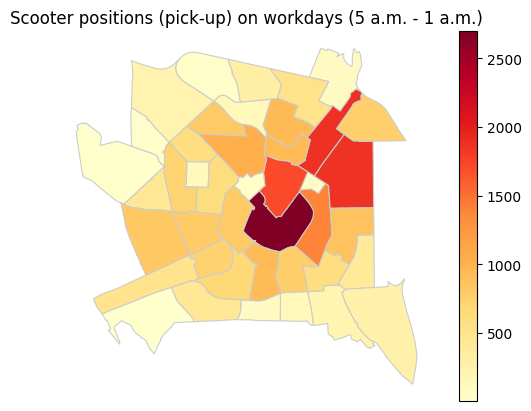

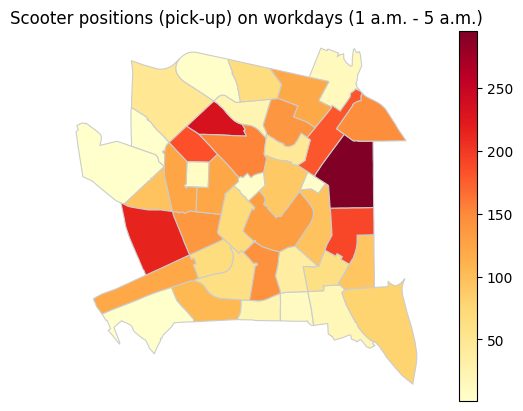

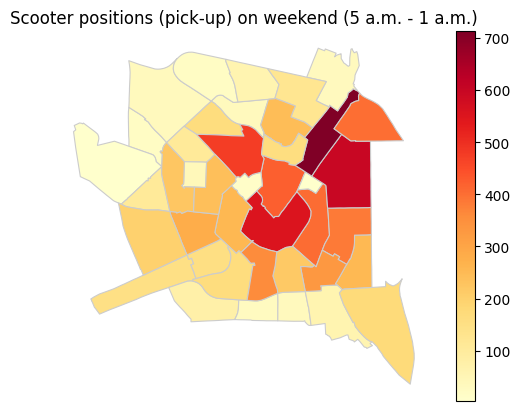

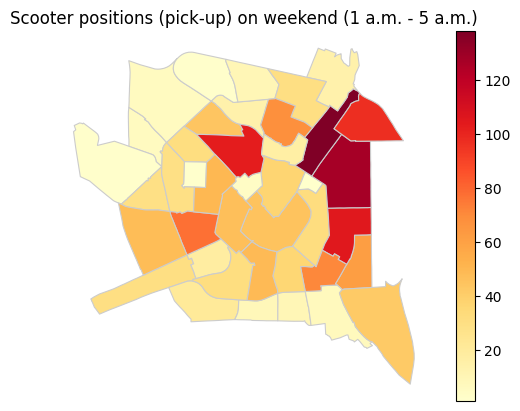

In [ ]:
ax_day_workdays_p = merged_day_workdays_p.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_day_workdays_p.set_axis_off()
ax_day_workdays_p.set_title('Scooter positions (pick-up) on workdays (5 a.m. - 1 a.m.)')

ax_night_workdays_p = merged_night_workdays_p.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_night_workdays_p.set_axis_off()
ax_night_workdays_p.set_title('Scooter positions (pick-up) on workdays (1 a.m. - 5 a.m.)')

ax_day_weekend_p = merged_day_weekdays_p.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_day_weekend_p.set_axis_off()
ax_day_weekend_p.set_title('Scooter positions (pick-up) on weekend (5 a.m. - 1 a.m.)')

ax_night_weekend_p = merged_night_weekdays_p.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_night_weekend_p.set_axis_off()
ax_night_weekend_p.set_title('Scooter positions (pick-up) on weekend (1 a.m. - 5 a.m.)')

# Save to PNG
fig_day_workdays_p = ax_day_workdays_p.get_figure()
fig_day_workdays_p.savefig('scooter_counts_day_workdays_p.png', bbox_inches = 'tight')
fig_night_workdays_p = ax_night_workdays_p.get_figure()
fig_night_workdays_p.savefig('scooter_counts_night_workdays_p.png', bbox_inches = 'tight')
fig_day_weekend_p = ax_day_weekend_p.get_figure()
fig_day_weekend_p.savefig('scooter_counts_day_weekend_p.png', bbox_inches = 'tight')
fig_night_weekend_p = ax_night_weekend_p.get_figure()
fig_night_weekend_p.savefig('scooter_counts_night_weekend_p.png', bbox_inches = 'tight')

In [ ]:
dropoff = ['drop-off', 'last seen / drop-off', 'drop-off outlier']
work_day_scooters_d = work_day_scooters[work_day_scooters['type'].isin(dropoff)]
work_night_scooters_d = work_night_scooters[work_night_scooters['type'].isin(dropoff)]
week_day_scooters_d = week_day_scooters[week_day_scooters['type'].isin(dropoff)]
week_night_scooters_d = week_night_scooters[week_night_scooters['type'].isin(dropoff)]

joined_day_workdays = gpd.sjoin(work_day_scooters_d, zones_gdf, predicate = 'within')
count_day_workdays = joined_day_workdays.groupby('nome').size().reset_index(name = 'count')
merged_day_workdays_d = zones_gdf.merge(count_day_workdays, on = 'nome')

joined_night_workdays = gpd.sjoin(work_night_scooters_d, zones_gdf, predicate = 'within')
count_night_workdays = joined_night_workdays.groupby('nome').size().reset_index(name = 'count')
merged_night_workdays_d = zones_gdf.merge(count_night_workdays, on = 'nome')

joined_day_weekdays = gpd.sjoin(week_day_scooters_d, zones_gdf, predicate = 'within')
count_day_weekdays = joined_day_weekdays.groupby('nome').size().reset_index(name = 'count')
merged_day_weekdays_d = zones_gdf.merge(count_day_weekdays, on = 'nome')

joined_night_weekdays = gpd.sjoin(week_night_scooters_d, zones_gdf, predicate = 'within')
count_night_weekdays = joined_night_weekdays.groupby('nome').size().reset_index(name = 'count')
merged_night_weekdays_d = zones_gdf.merge(count_night_weekdays, on = 'nome')

In [ ]:
zone_list = zones_gdf['nome']
day_work_tot = merged_day_workdays_d['count'].sum()
night_work_tot = merged_night_workdays_d['count'].sum()
day_week_tot = merged_day_weekdays_d['count'].sum()
night_week_tot = merged_night_weekdays_d['count'].sum()

print('ZONE' + ' ' * 30 + 'Workdays' + ' ' * 12 + 'Weekend')
print(' ' * 31 + 'Day      ' + 'Night      ' + 'Day      ' + 'Night\n')

for i in zone_list:
  try:
    day_work_count = merged_day_workdays_d[merged_day_workdays_d['nome'] == i]['count']
    day_work_perc = '{:.2f}%  |  '.format(round((int(day_work_count)/day_work_tot)*100, 2))
  except:
    day_work_perc = '0%     |  '
  try:
    night_work_count = merged_night_workdays_d[merged_night_workdays_d['nome'] == i]['count']
    night_work_perc = '{:.2f}%  |  '.format(round((int(night_work_count)/night_work_tot)*100, 2))
  except:
    night_work_perc = '0%     |  '
  try:
    day_week_count = merged_day_weekdays_d[merged_day_weekdays_d['nome'] == i]['count']
    day_week_perc = '{:.2f}%  |  '.format(round((int(day_week_count)/day_week_tot)*100, 2))
  except:
    day_week_perc = '0%     |  '
  try:
    night_week_count = merged_night_weekdays_d[merged_night_weekdays_d['nome'] == i]['count']
    night_week_perc = '{:.2f}%'.format(round((int(night_week_count)/night_week_tot)*100, 2))
  except:
    night_week_perc = '0%'
  num_spaces = 30 - len(i)
  print(i + ' ' * num_spaces + day_work_perc + night_work_perc + day_week_perc + night_week_perc)

ZONE                              Workdays            Weekend
                               Day      Night      Day      Night

QT 8                          0.08%  |  0.05%  |  0.26%  |  0.36%
S. SIRO                       0.04%  |  0.03%  |  0.05%  |  0%
GHISOLFA                      2.97%  |  6.18%  |  1.94%  |  2.67%
GIAMBELLINO                   1.83%  |  3.20%  |  1.71%  |  2.25%
S. CRISTOFORO                 1.59%  |  2.96%  |  0.81%  |  1.42%
RONCHETTO SUL NAVIGLIO        0.01%  |  0.03%  |  0%     |  0%
TIBALDI                       0.32%  |  0.57%  |  0.31%  |  0.89%
EX OM - MORIVIONE             0.53%  |  0.33%  |  0.44%  |  0.83%
FARINI                        0.57%  |  0.54%  |  0.42%  |  0.89%
UMBRIA - MOLISE               1.49%  |  2.50%  |  3.07%  |  3.61%
SELINUNTE                     1.60%  |  2.27%  |  1.21%  |  1.72%
GUASTALLA                     5.14%  |  2.53%  |  4.87%  |  2.25%
BRERA                         6.39%  |  2.53%  |  4.94%  |  1.48%
DUOMO              

We may also plot the choropleth maps.

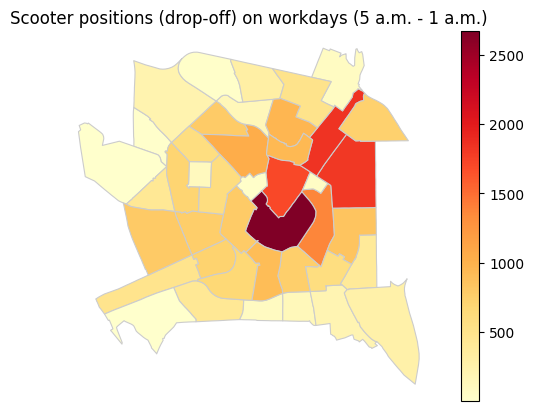

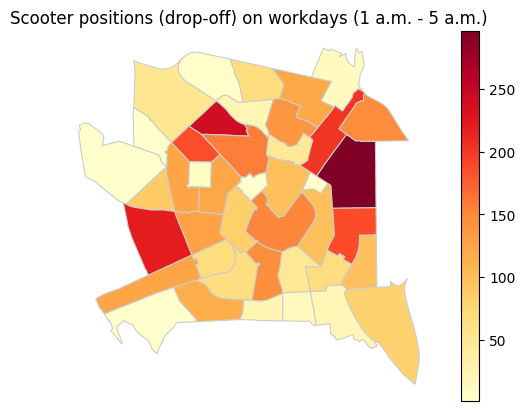

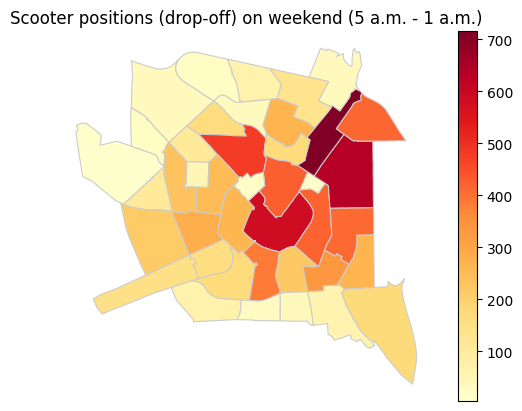

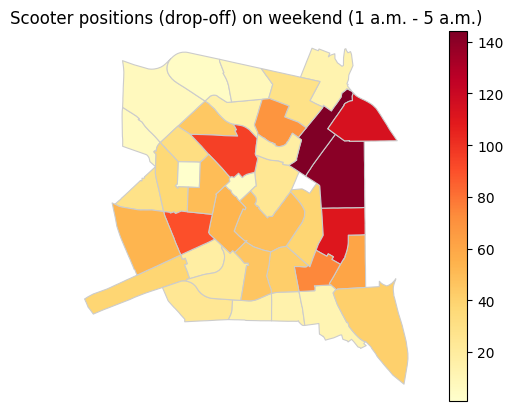

In [ ]:
ax_day_workdays_d = merged_day_workdays_d.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_day_workdays_d.set_axis_off()
ax_day_workdays_d.set_title('Scooter positions (drop-off) on workdays (5 a.m. - 1 a.m.)')

ax_night_workdays_d = merged_night_workdays_d.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_night_workdays_d.set_axis_off()
ax_night_workdays_d.set_title('Scooter positions (drop-off) on workdays (1 a.m. - 5 a.m.)')

ax_day_weekend_d = merged_day_weekdays_d.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_day_weekend_d.set_axis_off()
ax_day_weekend_d.set_title('Scooter positions (drop-off) on weekend (5 a.m. - 1 a.m.)')

ax_night_weekend_d = merged_night_weekdays_d.plot(column = 'count', cmap = 'YlOrRd', linewidth = 0.8, edgecolor = '0.8', legend = True)
ax_night_weekend_d.set_axis_off()
ax_night_weekend_d.set_title('Scooter positions (drop-off) on weekend (1 a.m. - 5 a.m.)')

# Save to PNG
fig_day_workdays_d = ax_day_workdays_d.get_figure()
fig_day_workdays_d.savefig('scooter_counts_day_workdays_d.png', bbox_inches = 'tight')
fig_night_workdays_d = ax_night_workdays_d.get_figure()
fig_night_workdays_d.savefig('scooter_counts_night_workdays_d.png', bbox_inches = 'tight')
fig_day_weekend_d = ax_day_weekend_d.get_figure()
fig_day_weekend_d.savefig('scooter_counts_day_weekend_d.png', bbox_inches = 'tight')
fig_night_weekend_d = ax_night_weekend_d.get_figure()
fig_night_weekend_d.savefig('scooter_counts_night_weekend_d.png', bbox_inches = 'tight')

Results are to be compared and analyzed in a separate table.

# Integration

In this section we integrate our research with other datasets found on the [Milan Open Data web page](https://https://dati.comune.milano.it/).

## Vehicle fleet

First of all, let's see a panoramic about the vehicle fleet of Milan.

In [25]:
df_1 = pd.read_csv('/content/gdrive/MyDrive/DSLSC/Other datasets/parco_veicolare_2019.csv', sep = ';')

In [26]:
df_1 = df_1.sort_values(by = 'Numero di veicoli')

In [27]:
df_1

Tipologia veicolo  Numero di veicoli
4          MOTOCARRI E QUADRICICLI TRASPORTO MERCI               1090
6  MOTOVEICOLI E QUADRICICLI SPECIALI  - SPECIFICI               1529
7    RIMORCHI E SEMIRIMORCHI SPECIALI  - SPECIFICI               2886
0                                          AUTOBUS               3014
9                      TRATTORI STRADALI O MOTRICI               3385
8          RIMORCHI E SEMIRIMORCHI TRASPORTO MERCI               4894
2                 AUTOVEICOLI SPECIALI - SPECIFICI              11268
1                                        AUTOCARRI              62473
5                                        MOTOCICLI             175647
3                                      AUTOVETTURE             690914

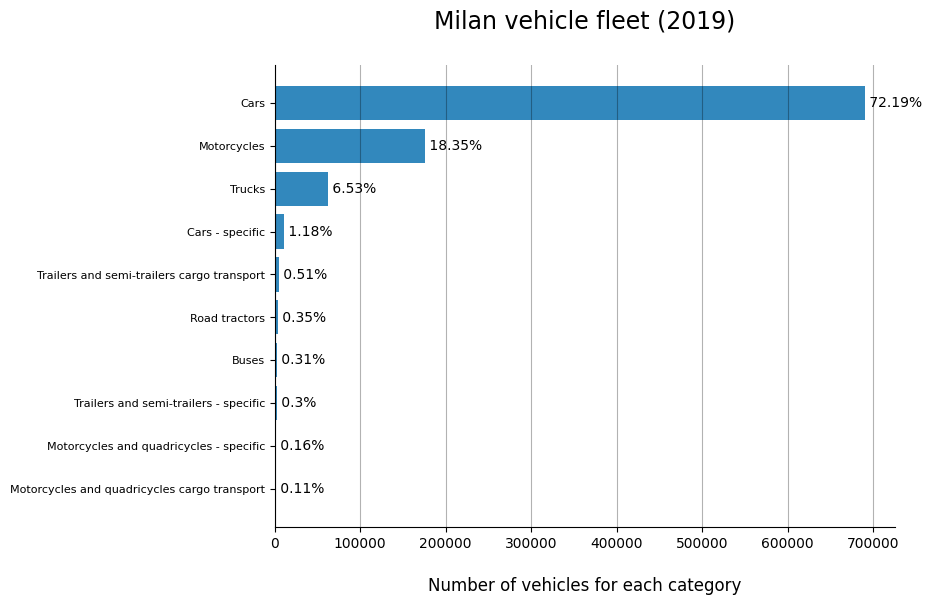

In [31]:
plt.figure(figsize = (8, 6)) 

# Create a list of indices for the y-axis labels
y_labels = range(1, len(df_1['Numero di veicoli']) + 1)

translated_labels = ['Motorcycles and quadricycles cargo transport', 'Motorcycles and quadricycles - specific', 'Trailers and semi-trailers - specific', 
                     'Buses', 'Road tractors', 'Trailers and semi-trailers cargo transport', 'Cars - specific', 'Trucks', 'Motorcycles', 'Cars']

# Create the horizontal bar plot
plt.barh(y_labels, df_1['Numero di veicoli'], color = '#3288bd')

# Set the y-axis ticks and labels
plt.yticks(y_labels, translated_labels, fontsize = 8)

# Set the plot title and labels
plt.title("Milan vehicle fleet (2019)\n", fontsize = 17)
plt.xlabel("\nNumber of vehicles for each category", fontsize = 12)

# Add labels to each bar
for i, value in enumerate(df_1['Numero di veicoli']):
  plt.text(value, i + 1, ' ' + str(np.around((value/sum(df_1['Numero di veicoli'])*100),2)) + '%', ha = 'left', va = 'center')

# Add vertical grid
plt.grid(axis = 'x', color = 'k', alpha = 0.3)

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('Milan vehicle fleet 2019.png', bbox_inches = 'tight', dpi = 300)

## Prevailing vehicle

Now we may explore the preferences of the citizens.

In [ ]:
df_2 = pd.read_csv('/content/gdrive/MyDrive/DSLSC/Other datasets/mezzo-di-trasporto-prevalente_2021.csv', sep = ';', encoding = 'mac_roman')

In [ ]:
df_2 = df_2[df_2['Mezzi di trasporto prevalente'] != 'Non disponibile']

In [ ]:
df_2

Id_NIL                       NIL Mezzi di trasporto prevalente  Valore
0         1                   Duomo                  Mezzi pubblici    1808
1         2                   Brera                  Mezzi pubblici    2006
2         3  Giardini Porta Venezia                  Mezzi pubblici      13
3         4               Guastalla                  Mezzi pubblici    1733
4         5               Vigentina                  Mezzi pubblici    1672
..      ...                       ...                           ...     ...
343      84              Parco Nord                     Altri mezzi       4
344      85     Parco delle Abbazie                     Altri mezzi      31
345      86       Parco dei Navigli                     Altri mezzi      29
346      87      Parco Agricolo Sud                     Altri mezzi      15
347      88   Parco Bosco in Citta'                     Altri mezzi      20

[348 rows x 4 columns]

In [ ]:
publics = sum(df_2[df_2['Mezzi di trasporto prevalente'] == 'Mezzi pubblici']['Valore'])
private = sum(df_2[df_2['Mezzi di trasporto prevalente'] == 'Auto privata']['Valore'])
walk = sum(df_2[df_2['Mezzi di trasporto prevalente'] == 'A piedi o in bicicletta']['Valore'])
other = sum(df_2[df_2['Mezzi di trasporto prevalente'] == 'Altri mezzi']['Valore'])

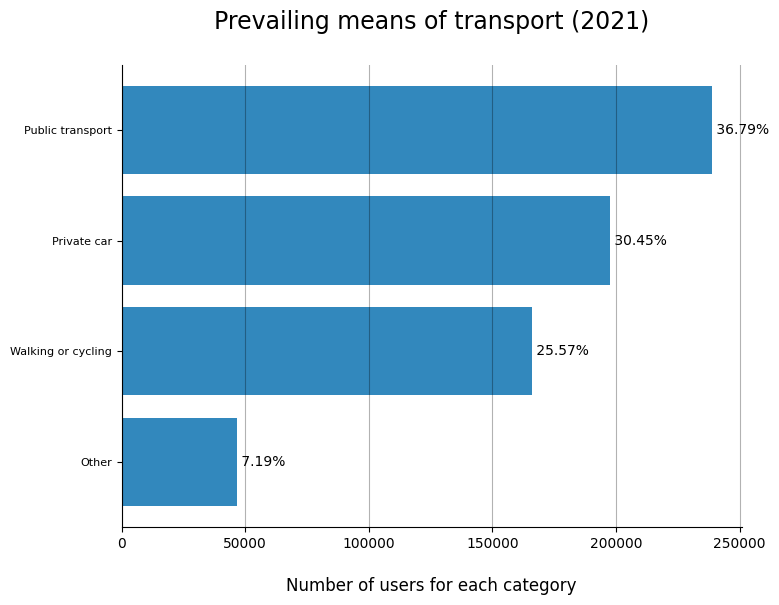

In [ ]:
plt.figure(figsize = (8, 6)) 

data = [publics, private, walk, other]

data.sort()
labels = ['Other', 'Walking or cycling', 'Private car', 'Public transport']
# Create a list of indices for the y-axis labels
y_labels = range(1, 5)

# Create the horizontal bar plot
plt.barh(y_labels, data, color = '#3288bd')

# Set the y-axis ticks and labels
plt.yticks(y_labels, labels, fontsize = 8)

# Set the plot title and labels
plt.title("Prevailing means of transport (2021)\n", fontsize = 17)
plt.xlabel("\nNumber of users for each category", fontsize = 12)

# Add labels to each bar
for i, value in enumerate(data):
  plt.text(value, i + 1, ' ' + str(np.around((value/sum(data)*100),2)) + '%', ha = 'left', va = 'center')

# Add vertical grid
plt.grid(axis = 'x', color = 'k', alpha = 0.3)

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('Prevailing means of transport 2021.png', bbox_inches = 'tight', dpi = 300)

We now relate preferences to the Milan NIL.

In [ ]:
milan_nil = gpd.read_file("/content/gdrive/MyDrive/DSLSC/NIL_E0.zip")

In [ ]:
milan_nil = milan_nil.sort_values(by = 'ID_NIL').reset_index(drop = True)

In [ ]:
public_series = df_2[df_2['Mezzi di trasporto prevalente'] == 'Mezzi pubblici'].sort_values('Id_NIL').reset_index(drop = True)
private_series = df_2[df_2['Mezzi di trasporto prevalente'] == 'Auto privata'].sort_values('Id_NIL').reset_index(drop = True)
walk_series = df_2[df_2['Mezzi di trasporto prevalente'] == 'A piedi o in bicicletta'].sort_values('Id_NIL').reset_index(drop = True)
other_series = df_2[df_2['Mezzi di trasporto prevalente'] == 'Altri mezzi'].sort_values('Id_NIL').reset_index(drop = True)

The NIL 8 (Parco Sempione) is missing from the dataset about preferences, so we remove it from milan_nil dataset too.

In [ ]:
milan_nil = milan_nil[milan_nil['ID_NIL'] != 8].reset_index(drop = True)

In [ ]:
milan_nil['public'] = public_series['Valore']
milan_nil['private'] = private_series['Valore']
milan_nil['walk'] = walk_series['Valore']
milan_nil['other'] = other_series['Valore']

In [ ]:
# Converting into percentages
for i in range(len(milan_nil)):
  tot = milan_nil['public'][i]+milan_nil['private'][i]+milan_nil['walk'][i]+milan_nil['other'][i]
  milan_nil['public'][i] = milan_nil['public'][i]/tot
  milan_nil['private'][i] = milan_nil['private'][i]/tot
  milan_nil['walk'][i] = milan_nil['walk'][i]/tot
  milan_nil['other'][i] = milan_nil['public'][i]/tot

<ipython-input-15-90ff42a64306>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_nil['public'][i] = milan_nil['public'][i]/tot
<ipython-input-15-90ff42a64306>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_nil['private'][i] = milan_nil['private'][i]/tot
<ipython-input-15-90ff42a64306>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_nil['walk'][i] = milan_nil['walk'][i]/tot
<ipython-input-15-90ff42a64306>:7: Setting

In [ ]:
milan_nil['pref'] = 0*len(milan_nil)
for i in range(len(milan_nil)):
  pref = max(milan_nil['public'][i], milan_nil['private'][i], milan_nil['walk'][i], milan_nil['other'][i])
  if(milan_nil['public'][i] == pref):
    milan_nil['pref'][i] = 'public'
  if(milan_nil['private'][i] == pref):
    milan_nil['pref'][i] = 'private'
  if(milan_nil['walk'][i] == pref):
    milan_nil['pref'][i] = 'walk'
  if(milan_nil['other'][i] == pref):
    milan_nil['pref'][i] = 'other'

<ipython-input-16-1f4882cacdbe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_nil['pref'][i] = 'walk'


In [ ]:
milan_nil

FID_1  FID_1_1  ID_NIL                     NIL      AreaHA        AreaMQ  \
0      34       34       1                   DUOMO   234.17041  2.341704e+06   
1      33       33       2                   BRERA   163.73952  1.637395e+06   
2      56       56       3  GIARDINI PORTA VENEZIA    24.96468  2.496468e+05   
3      32       32       4               GUASTALLA   154.80207  1.548021e+06   
4      82       82       5               VIGENTINA   113.52393  1.135239e+06   
..    ...      ...     ...                     ...         ...           ...   
82     50       50      84              PARCO NORD   153.36394  1.533639e+06   
83     64       64      85     PARCO DELLE ABBAZIE  1372.20000  1.372200e+07   
84     85       85      86       PARCO DEI NAVIGLI   361.78363  3.617836e+06   
85     46       46      87      PARCO AGRICOLO SUD   584.45801  5.844580e+06   
86     80       80      88    PARCO BOSCO IN CITT
   783.76686  7.837669e+06   

                                             geometry    public   private  \
0   POLYGON ((514169.058 5035072.106, 514237.092 5...  0.226794  0.207100   
1   POLYGON ((515451.615 5035909.770, 515399.620 5...  0.241193  0.227847   
2   POLYGON ((515871.254 5035800.528, 515951.340 5...  0.254902  0.215686   
3   POLYGON ((516148.141 5035400.257, 516148.141 5...  0.233087  0.233490   
4   POLYGON ((515367.871 5033186.773, 515385.130 5...  0.259104  0.218193   
..                                                ...       ...       ...   
82  POLYGON ((513986.565 5042438.269, 513988.554 5...  0.352113  0.422535   
83  POLYGON ((516983.381 5030950.394, 517001.251 5...  0.216216  0.491892   
84  POLYGON ((511945.918 5029087.492, 511893.944 5...  0.237624  0.460396   
85  POLYGON ((503595.866 5034483.861, 503665.544 5...  0.278689  0.524590   
86  POLYGON ((507813.937 5037156.421, 507928.997 5...  0.248804  0.454545   

        walk     other     pref  
0   0.464752  0.000028     walk  
1   0.416977  0.000029     walk  
2   0.372549  0.004998     walk  
3   0.434163  0.000031     walk  
4   0.405238  0.000040     walk  
..       ...       ...      ...  
82  0.169014  0.004959  private  
83  0.124324  0.001169  private  
84  0.158416  0.001176  private  
85  0.073770  0.002284  private  
86  0.200957  0.001190  private  

[87 rows x 12 columns]

In [ ]:
# Ensuring the crs is the same
milan_nil = milan_nil.to_crs('EPSG: 4326')

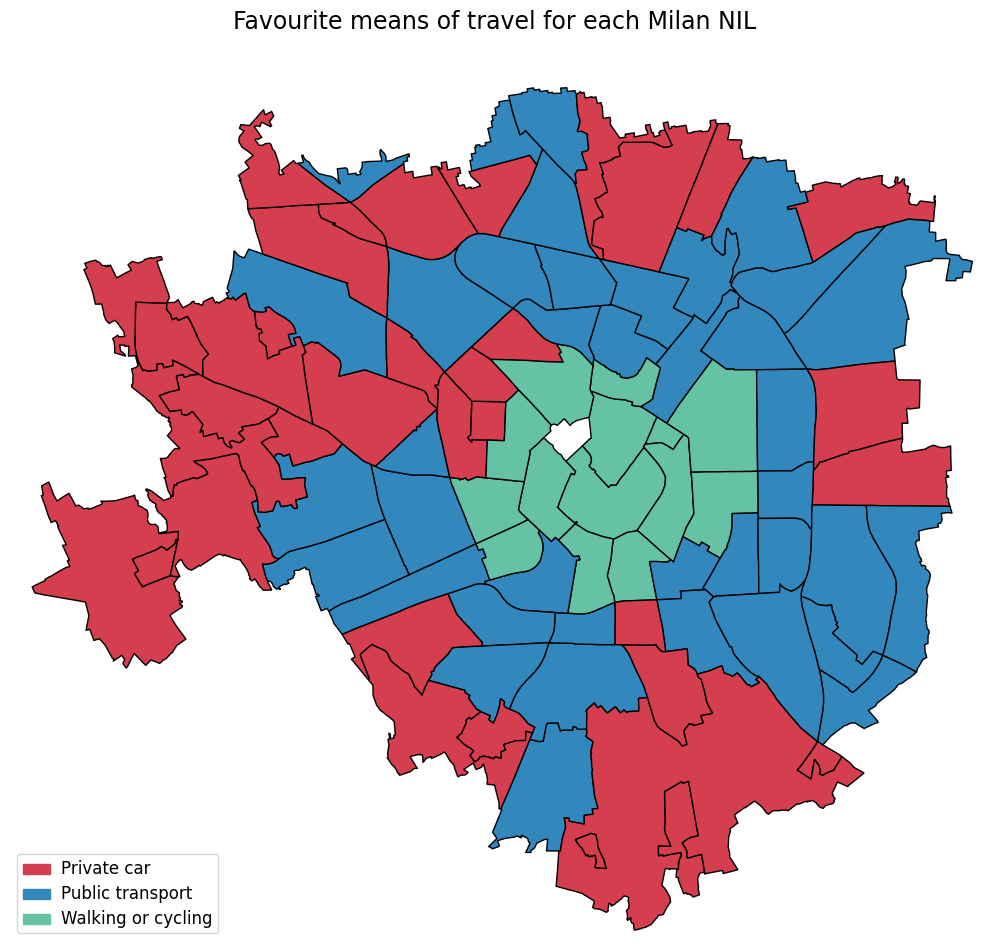

In [ ]:
# Create a ListedColormap with the specified colors
colors = ['#d53e4f', '#3288bd', '#66c2a5'] 
color_map = ListedColormap(colors)

# Plot the quarters polygons
ax = milan_nil.plot(column = 'pref', edgecolor = 'k', figsize = (10, 10), cmap = color_map)

# Add labels and title
ax.set_title('Favourite means of travel for each Milan NIL\n', fontsize = 17)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
labels = ['Private car', 'Public transport', 'Walking or cycling']
handles = [plt.Rectangle((0, 0), 1, 1, color = color) for color in colors]
legend = ax.legend(handles, labels, loc = 'lower left')
legend.get_texts()[0].set_fontsize(12)
legend.get_texts()[1].set_fontsize(12)
legend.get_texts()[2].set_fontsize(12)

# Set the axis limits
ax.set_xlim(9.035, 9.28)
ax.set_ylim(45.385, 45.54)

# Remove axis
plt.axis('off')

plt.tight_layout()

plt.savefig('Favourite means of travel 1.png', bbox_inches = 'tight', dpi = 300)

This may be correlated with the subway stations.

In [ ]:
metro_lines = gpd.read_file("/content/gdrive/MyDrive/DSLSC/Other datasets/tpl_metropercorsi_shp.zip")

In [ ]:
# Ensuring the crs is the same
metro_lines = metro_lines.to_crs('EPSG: 4326')

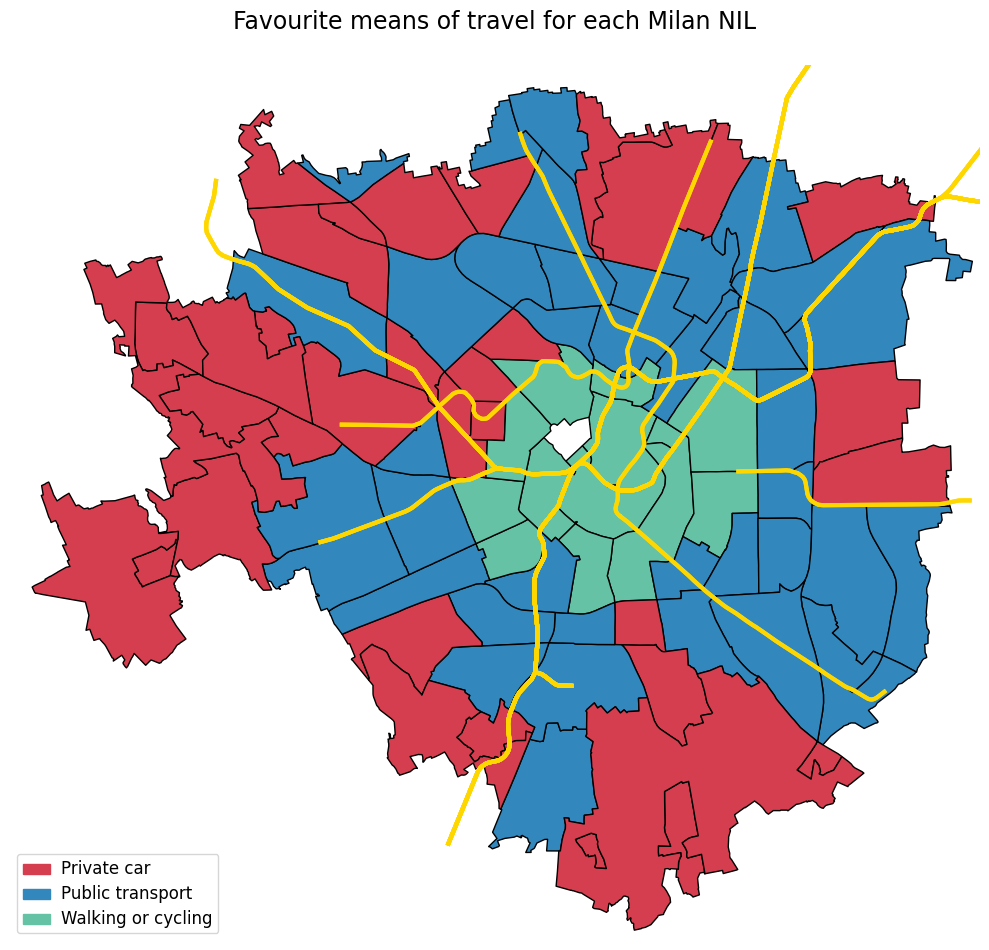

In [ ]:
# Create a ListedColormap with the specified colors
colors = ['#d53e4f', '#3288bd', '#66c2a5'] 
color_map = ListedColormap(colors)

# Plot the quarters polygons
ax = milan_nil.plot(column = 'pref', edgecolor = 'k', figsize = (10, 10), cmap = color_map)
metro_lines.plot(ax = ax, color = 'gold', linewidth = 3, edgecolor = 'k')

# Add labels and title
ax.set_title('Favourite means of travel for each Milan NIL\n', fontsize = 17)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
labels = ['Private car', 'Public transport', 'Walking or cycling']
handles = [plt.Rectangle((0, 0), 1, 1, color = color) for color in colors]
legend = ax.legend(handles, labels, loc = 'lower left')
legend.get_texts()[0].set_fontsize(12)
legend.get_texts()[1].set_fontsize(12)
legend.get_texts()[2].set_fontsize(12)

# Set the axis limits
ax.set_xlim(9.035, 9.28)
ax.set_ylim(45.385, 45.54)

# Remove axis
plt.axis('off')

plt.tight_layout()

plt.savefig('Favourite means of travel 2.png', bbox_inches = 'tight', dpi = 300)

This may be correlated with Area C.

In [ ]:
area_c = gpd.read_file("/content/gdrive/MyDrive/DSLSC/Other datasets/disciplina_aree_shp.zip")

In [ ]:
# Ensuring the crs is the same
area_c = area_c.to_crs('EPSG: 4326')

In [ ]:
area_c = area_c[area_c['nome'] == 'AreaC']

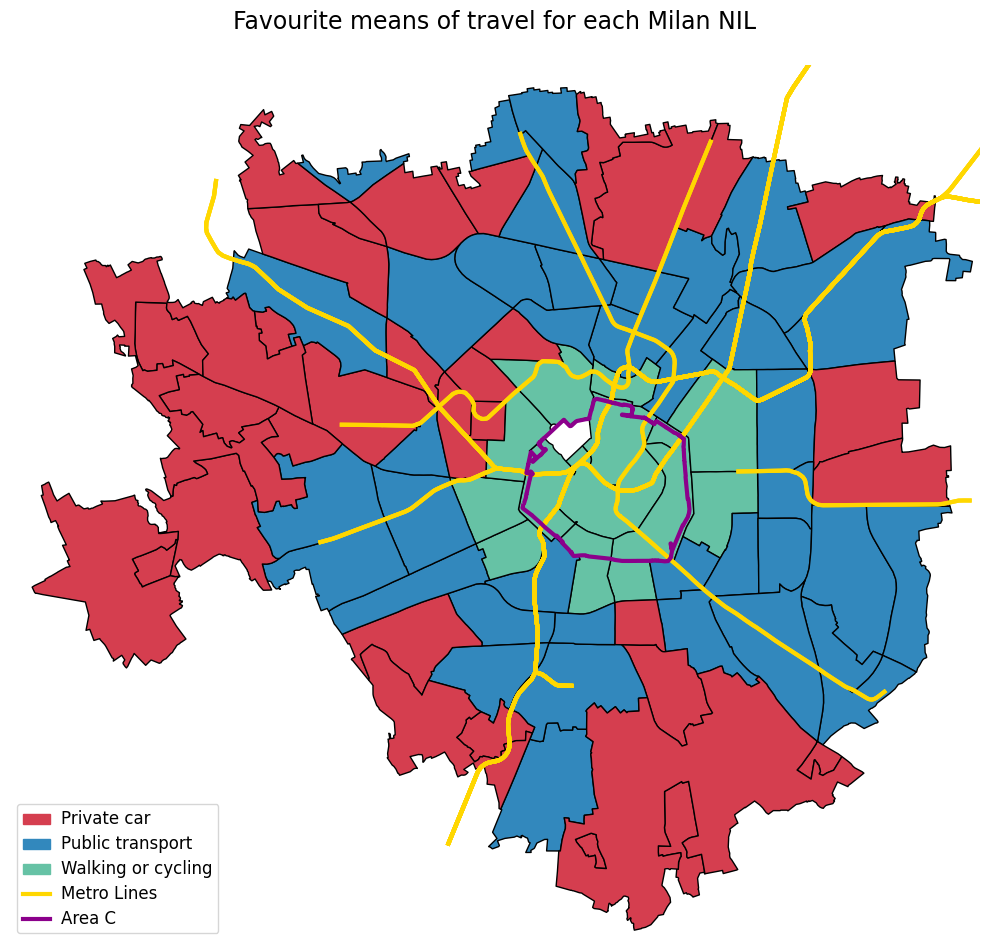

In [ ]:
# Create a ListedColormap with the specified colors
colors = ['#d53e4f', '#3288bd', '#66c2a5'] 
color_map = ListedColormap(colors)

# Plot the quarters polygons
ax = milan_nil.plot(column = 'pref', edgecolor = 'k', figsize = (10, 10), cmap = color_map)
metro_lines.plot(ax = ax, color = 'gold', linewidth = 3, edgecolor = 'k')
area_c.boundary.plot(ax = ax, linewidth = 3, edgecolor = 'darkmagenta', facecolor = None)

# Add labels and title
ax.set_title('Favourite means of travel for each Milan NIL\n', fontsize = 17)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
labels = ['Private car', 'Public transport', 'Walking or cycling']
handles = [plt.Rectangle((0, 0), 1, 1, color = color) for color in colors]
labels += ['Metro Lines', 'Area C']
handles += [plt.Line2D([0], [0], color = 'gold', linewidth = 3),
            plt.Line2D([0], [0], color = 'darkmagenta', linewidth = 3)]
legend = ax.legend(handles, labels, loc = 'lower left')
for text in legend.get_texts():
    text.set_fontsize(12)

# Set the axis limits
ax.set_xlim(9.035, 9.28)
ax.set_ylim(45.385, 45.54)

# Remove axis
plt.axis('off')

plt.tight_layout()

plt.savefig('Favourite means of travel 3.png', bbox_inches = 'tight', dpi = 300)

Now we may relate the map above with the e-scooters.

In [ ]:
scooters = pd.read_csv('/content/gdrive/MyDrive/DSLSC/motoscooter_movimento_new.csv')

In [ ]:
geo_scooters = gpd.GeoDataFrame(scooters, crs = 'EPSG:4326', geometry = gpd.points_from_xy(scooters.placelon, scooters.placelat))

In [ ]:
# Ensuring the crs is the same
geo_scooters = geo_scooters.to_crs('EPSG: 4326')

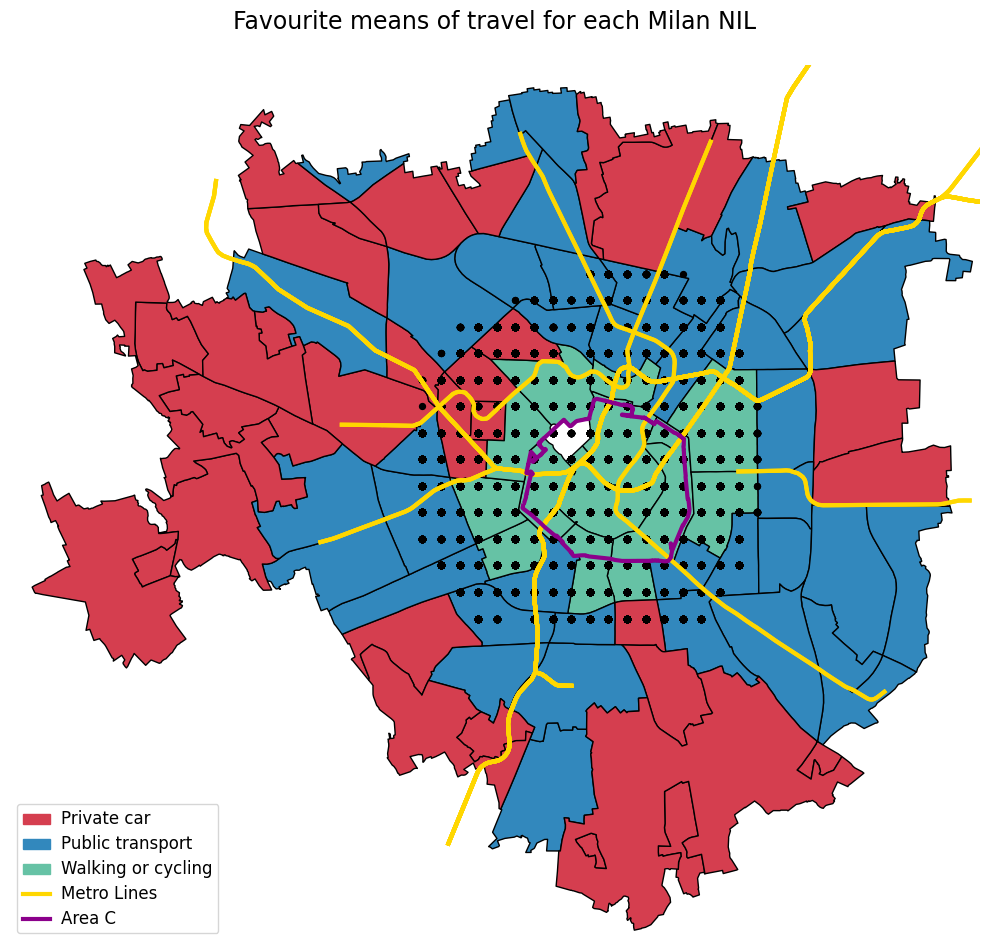

In [ ]:
# Create a ListedColormap with the specified colors
colors = ['#d53e4f', '#3288bd', '#66c2a5'] 
color_map = ListedColormap(colors)

# Plot the quarters polygons
ax = milan_nil.plot(column = 'pref', edgecolor = 'k', figsize = (10, 10), cmap = color_map)
geo_scooters.plot(ax = ax, color = "k", markersize = 18)
metro_lines.plot(ax = ax, color = 'gold', linewidth = 3, edgecolor = 'k')
area_c.boundary.plot(ax = ax, linewidth = 3, edgecolor = 'darkmagenta', facecolor = None)

# Add labels and title
ax.set_title('Favourite means of travel for each Milan NIL\n', fontsize = 17)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
labels = ['Private car', 'Public transport', 'Walking or cycling']
handles = [plt.Rectangle((0, 0), 1, 1, color = color) for color in colors]
labels += ['Metro Lines', 'Area C']
handles += [plt.Line2D([0], [0], color = 'gold', linewidth = 3),
            plt.Line2D([0], [0], color = 'darkmagenta', linewidth = 3)]
legend = ax.legend(handles, labels, loc = 'lower left')
for text in legend.get_texts():
    text.set_fontsize(12)

# Set the axis limits
ax.set_xlim(9.035, 9.28)
ax.set_ylim(45.385, 45.54)

# Remove axis
plt.axis('off')

plt.tight_layout()

plt.savefig('Favourite means of travel 4.png', bbox_inches = 'tight', dpi = 300)

## Sharing mobility

Now we may analyze a simple time series of the sharong mobility in Milan.

In [5]:
df_3 = pd.read_csv('/content/gdrive/MyDrive/DSLSC/Other datasets/car_bike_scooter_sharing.csv', sep = ';')

We have to clean a bit. We're interested in the total number and the number of subscribers.

In [6]:
df_3.drop(['note', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis = 1, inplace = True)

In [7]:
df_3 = df_3[df_3['sharing_veicoli_indicatori'] != 'Numero di chilometri percorsi']
df_3 = df_3[df_3['sharing_veicoli_indicatori'] != 'Aree di sosta']
df_3 = df_3[df_3['sharing_veicoli_indicatori'] != 'Numero di punti di riconsegna']
df_3 = df_3[df_3['sharing_veicoli_indicatori'] != 'Stalli di sosta']
df_3 = df_3[df_3['sharing_veicoli_indicatori'] != 'Stazioni attive']
df_3 = df_3[df_3['sharing_veicoli_indicatori'] != 'Noleggi medi giornalieri']
df_3 = df_3[df_3['sharing_veicoli_indicatori'] != 'Autovetture elettriche']
df_3 = df_3[df_3['sharing_veicoli_indicatori'] != 'scooter elettrici']
df_3 = df_3[df_3['sharing_veicoli_indicatori'] != 'Numero di prelievi']
df_3 = df_3[df_3['sharing_veicoli_indicatori'] != 'Numero di prelievi totale']
df_3 = df_3[df_3['sharing_veicoli_indicatori'] != 'Numero di biciclette elettriche']	

In [8]:
df_3['sharing_veicoli_indicatori'] = df_3['sharing_veicoli_indicatori'].apply(lambda x: 'Numero di biciclette totale' if x == 'Numero di biciclette' else x)
df_3['sharing_veicoli_indicatori'] = df_3['sharing_veicoli_indicatori'].apply(lambda x: 'Autovetture totale' if x == 'autovetture totale' else x)
df_3['sharing_veicoli_indicatori'] = df_3['sharing_veicoli_indicatori'].apply(lambda x: 'Scooter totale' if x == 'scooter totale' else x)

In [9]:
df_3.reset_index(drop = True, inplace = True)

In [10]:
df_3 = df_3.fillna(0)

We have multiple hierarchies:
* anno.
  * car sharing / bike sharing / scooter sharing / monopattini.
    * Station Based / Free Floating.

In [11]:
car = df_3[df_3['sharing_veicoli'] == 'car sharing'].reset_index(drop = True)
car_based = car[car['sharing_veicoli_tipologia'] == 'Station Based'].reset_index(drop = True)
car_based_sub =  car_based[car_based['sharing_veicoli_indicatori'] == 'Numero di abbonati'].reset_index(drop = True)
car_based_tot =  car_based[car_based['sharing_veicoli_indicatori'] == 'Autovetture totale'].reset_index(drop = True)
car_free = car[car['sharing_veicoli_tipologia'] == 'Free Floating'].reset_index(drop = True)
car_free_sub =  car_free[car_free['sharing_veicoli_indicatori'] == 'Numero di abbonati'].reset_index(drop = True)
car_free_tot =  car_free[car_free['sharing_veicoli_indicatori'] == 'Autovetture totale'].reset_index(drop = True)

bike = df_3[df_3['sharing_veicoli'] == 'bike sharing'].reset_index(drop = True)
bike_based =  bike[bike['sharing_veicoli_tipologia'] == 'Station Based'].reset_index(drop = True)
bike_based_sub =  bike_based[bike_based['sharing_veicoli_indicatori'] == 'Numero di abbonati'].reset_index(drop = True)
bike_based_tot =  bike_based[bike_based['sharing_veicoli_indicatori'] == 'Numero di biciclette totale'].reset_index(drop = True)
bike_free = bike[bike['sharing_veicoli_tipologia'] == 'Free Floating'].reset_index(drop = True)
bike_free_sub =  bike_free[bike_free['sharing_veicoli_indicatori'] == 'Numero di abbonati'].reset_index(drop = True)
bike_free_tot =  bike_free[bike_free['sharing_veicoli_indicatori'] == 'Numero di biciclette totale'].reset_index(drop = True)

scooter = df_3[df_3['sharing_veicoli'] == 'scooter sharing'].reset_index(drop = True)   # Only free-floating
scooter_sub = scooter[scooter['sharing_veicoli_indicatori'] == 'Numero di abbonati'].reset_index(drop = True)
scooter_tot = scooter[scooter['sharing_veicoli_indicatori'] == 'Scooter totale'].reset_index(drop = True)

monopattini = df_3[df_3['sharing_veicoli'] == 'monopattini'].reset_index(drop = True)   # Only free-floating 
monopattini_sub = monopattini[monopattini['sharing_veicoli_indicatori'] == 'Numero di abbonati'].reset_index(drop = True)
monopattini_tot = monopattini[monopattini['sharing_veicoli_indicatori'] == 'Numero di monopattini autorizzati'].reset_index(drop = True)

Let's explore the total number during the years.

<ipython-input-12-4e6d97b28be4>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_free_tot_list.extend(list(car_free_tot['sharing_veicoli_valore'].str.replace('.', '').astype(int)))
<ipython-input-12-4e6d97b28be4>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_based_tot_list = list(car_based_tot['sharing_veicoli_valore'].str.replace('.', '').astype(int))
<ipython-input-12-4e6d97b28be4>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bike_based_tot_list = list(bike_based_tot['sharing_veicoli_valore'].str.replace

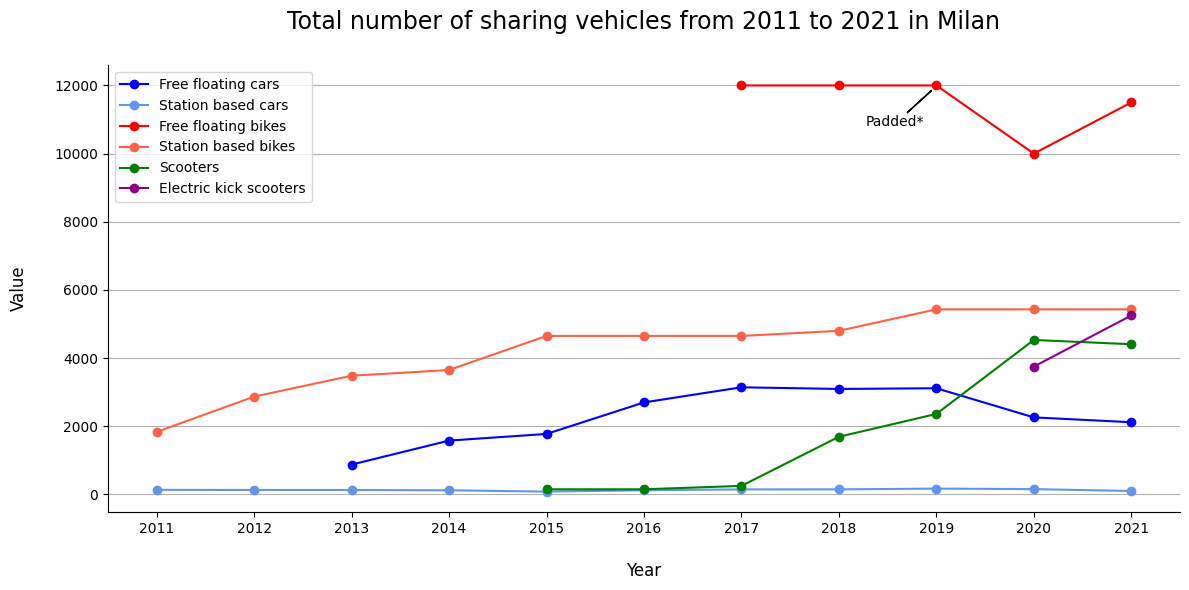

In [12]:
car_free_tot_list = [0, 0]
car_free_tot_list.extend(list(car_free_tot['sharing_veicoli_valore'].str.replace('.', '').astype(int)))
car_based_tot_list = list(car_based_tot['sharing_veicoli_valore'].str.replace('.', '').astype(int))

bike_free_tot_list = [0, 0, 0, 0, 0, 0, 12000, 12000, 12000, 10000, 11500]
bike_based_tot_list = list(bike_based_tot['sharing_veicoli_valore'].str.replace('.', '').astype(int))

scooter_tot_list = [0, 0, 0, 0]
scooter_tot_list.extend(list(scooter_tot['sharing_veicoli_valore'].str.replace('.', '').astype(int)))

monopattini_tot = [0, 0, 0, 0, 0, 0, 0, 0, 0, 3750, 5250]

years = range(2011, 2022)

plt.figure(figsize = (12, 6))

plt.plot(years, [v if v!= 0 else None for v in car_free_tot_list], marker = 'o', label = 'Free floating cars', color = 'blue')
plt.plot(years, [v if v!= 0 else None for v in car_based_tot_list], marker = 'o', label = 'Station based cars', color = 'cornflowerblue')
plt.plot(years, [v if v!= 0 else None for v in bike_free_tot_list], marker = 'o', label = 'Free floating bikes', color = 'red')
plt.plot(years, [v if v!= 0 else None for v in bike_based_tot_list], marker = 'o', label = 'Station based bikes', color = 'tomato')
plt.plot(years, [v if v!= 0 else None for v in scooter_tot_list], marker = 'o', label = 'Scooters', color = 'green')
plt.plot(years, [v if v!= 0 else None for v in monopattini_tot], marker = 'o', label = 'Electric kick scooters', color = 'darkmagenta')

# Padded value
plt.annotate('Padded*', ha = 'center', xy = (2018.5, 10000), xytext = (5, 20), textcoords = 'offset points')
plt.arrow(2018.7, 11200, 0.25, 650, head_width = 0)

# Add labels and title
plt.xlabel('\nYear', fontsize = 12)
plt.ylabel('Value\n', fontsize = 12)
plt.title('Total number of sharing vehicles from 2011 to 2021 in Milan\n', fontsize = 17)

# Set x-axis ticks for each year
plt.xticks(np.arange(2011, 2022, 1))

# Add legend
plt.legend(loc = 'upper left')

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add horizontal grid
plt.grid(axis = 'y', color = 'k', alpha = 0.3)

plt.tight_layout()

# Save the plot
plt.savefig('Sharing vehicle series.png', bbox_inches = 'tight', dpi = 300)

Let's explore the number of subscribers during the years.

<ipython-input-13-0f864d46c831>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_free_sub_list.extend(list(car_free_sub['sharing_veicoli_valore'].str.replace('.', '').astype(int)))
<ipython-input-13-0f864d46c831>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_based_sub_list = list(car_based_sub['sharing_veicoli_valore'].str.replace('.', '').astype(int))
<ipython-input-13-0f864d46c831>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bike_based_sub_list = list(bike_based_sub['sharing_veicoli_valore'].str.replace

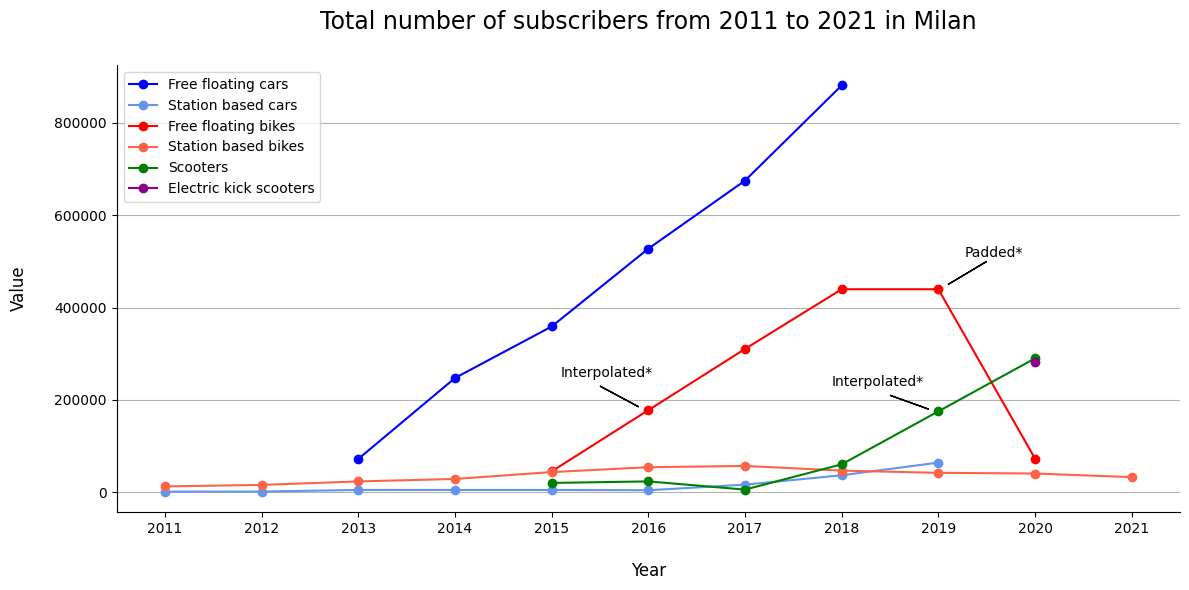

In [13]:
car_free_sub_list = [0, 0]
car_free_sub_list.extend(list(car_free_sub['sharing_veicoli_valore'].str.replace('.', '').astype(int)))
car_free_sub_list.extend([0, 0, 0])
car_based_sub_list = list(car_based_sub['sharing_veicoli_valore'].str.replace('.', '').astype(int))
car_based_sub_list.extend([0, 0])

bike_free_sub_list = [0, 0, 0, 0, 45280, 177864, 310448, 439756, 439756, 73127, 0] 
bike_based_sub_list = list(bike_based_sub['sharing_veicoli_valore'].str.replace('.', '').astype(int))

scooter_sub_list = [0, 0, 0, 0, 20224, 23543, 5766, 60502, 175251, 290000, 0]

monopattini_tot = [0, 0, 0, 0, 0, 0, 0, 0, 0, 282707, 0]

years = range(2011, 2022)

plt.figure(figsize = (12, 6))

plt.plot(years, [v if v!= 0 else None for v in car_free_sub_list], marker = 'o', label = 'Free floating cars', color = 'blue')
plt.plot(years, [v if v!= 0 else None for v in car_based_sub_list], marker = 'o', label = 'Station based cars', color = 'cornflowerblue')
plt.plot(years, [v if v!= 0 else None for v in bike_free_sub_list], marker = 'o', label = 'Free floating bikes', color = 'red')
plt.plot(years, [v if v!= 0 else None for v in bike_based_sub_list], marker = 'o', label = 'Station based bikes', color = 'tomato')
plt.plot(years, [v if v!= 0 else None for v in scooter_sub_list], marker = 'o', label = 'Scooters', color = 'green')
plt.plot(years, [v if v!= 0 else None for v in monopattini_tot], marker = 'o', label = 'Electric kick scooters', color = 'darkmagenta')

# Interpolated values
plt.annotate('Interpolated*', ha = 'center', xy = (2015.5, 190000), xytext = (5, 20), textcoords = 'offset points')
plt.arrow(2015.5, 230000, 0.4, -45000, head_width = 0)
plt.annotate('Padded*', ha = 'center', xy = (2019.5, 450000), xytext = (5, 20), textcoords = 'offset points')
plt.arrow(2019.5, 500000, -0.4, -50000, head_width = 0)
plt.annotate('Interpolated*', ha = 'center', xy = (2018.3, 170000), xytext = (5, 20), textcoords = 'offset points')
plt.arrow(2018.5, 210000, 0.4, -30000, head_width = 0)

# Add labels and title
plt.xlabel('\nYear', fontsize = 12)
plt.ylabel('Value\n', fontsize = 12)
plt.title('Total number of subscribers from 2011 to 2021 in Milan\n', fontsize = 17)

# Set x-axis ticks for each year
plt.xticks(np.arange(2011, 2022, 1))

# Add legend
plt.legend(loc = 'upper left')

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add horizontal grid
plt.grid(axis = 'y', color = 'k', alpha = 0.3)

plt.tight_layout()

# Save the plot
plt.savefig('Subscribers number series.png', bbox_inches = 'tight', dpi = 300)

Now let's go deeeper into 2021 with a treemap.

In [14]:
df_3[74:]

anno  sharing_veicoli sharing_veicoli_tipologia  \
74  2021     bike sharing             Station Based   
75  2021     bike sharing             Free Floating   
76  2021     bike sharing             Station Based   
77  2021      car sharing             Free Floating   
78  2021      car sharing             Station Based   
79  2021      monopattini             Free Floating   
80  2021  scooter sharing             Free Floating   

           sharing_veicoli_indicatori sharing_veicoli_valore  
74        Numero di biciclette totale                  5.430  
75        Numero di biciclette totale                 11.500  
76                 Numero di abbonati                 32.784  
77                 Autovetture totale                  2.118  
78                 Autovetture totale                    100  
79  Numero di monopattini autorizzati                  5.250  
80                     Scooter totale                  4.407

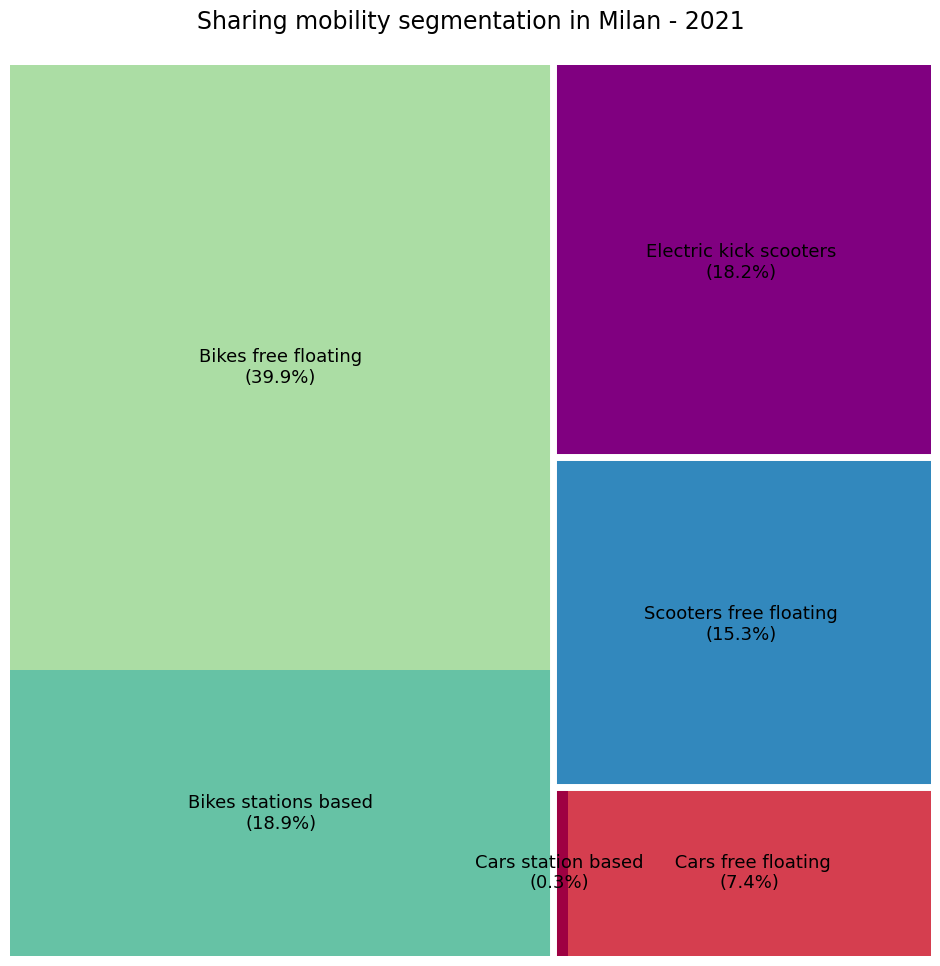

In [15]:
plt.figure(figsize = (10, 10))

data = [5430, 11500, 100, 2118, 4407, 5250]

# [based bikes, free bikes, based cars, free cars, tot scooters]
labels = ['Bikes stations based\n(18.9%)', 'Bikes free floating\n(39.9%)', 'Cars station based\n(0.3%)', 
          ' Cars free floating\n(7.4%)', 'Scooters free floating\n(15.3%)', 'Electric kick scooters\n(18.2%)']
colors = ['#66c2a5', '#abdda4', '#9e0142', '#d53e4f', '#3288bd', 'purple']
  
squarify.plot(data, label = labels, color = colors, text_kwargs = {'fontsize': 13})
plt.axvline(x = 59, color = 'white', linewidth = 5)
x_1 = np.linspace(59, 100, num = 100)
plt.plot(x_1, np.full_like(x_1, 56), color = 'white', linewidth = 5)
x_2 = np.linspace(59, 100, num = 100)
plt.plot(x_2, np.full_like(x_2, 19), color = 'white', linewidth = 5)
plt.title('Sharing mobility segmentation in Milan - 2021\n', fontsize = 17)
plt.tight_layout()
plt.axis('off')

# Save the plot
plt.savefig('Sharing segmentation 2021.png', bbox_inches = 'tight', dpi = 300)